In [2]:
%matplotlib inline

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import OpenSSL.crypto as ssl
import matplotlib, OpenSSL, ssl, subprocess, pickle, collections, datetime, hashlib, os, re, time, sys
from matplotlib.pyplot import MultipleLocator
from brokenaxes import brokenaxes

In [3]:
TUMDarkerBlue="#004b87"
TUMLighterBlue="#92c1e9"
TUMBlue="#005eb8"
TUMOrange="#e87722"

# 读取文件 

In [4]:
raw_doq = pd.read_json("./result_doq_cert_prase.txt",lines=True)
raw_doq

,ip,certLen,certChainSize,eachCertSize,eachSubjectSize,eachIssuerSize,eachSigntSize,eachPkInfoSize,eachExtenSize,eachSignAlgo,eachSubject,eachSANSize,eachSCTSize,eachex_value_size,eachOrganization
0,103.181.143.111,3,5595,"[1846, 1826, 1923]","[30, 52, 81]","[52, 81, 65]","[256, 512, 256]","[294, 294, 550]","[481, 177, 248]","[SHA256-RSA, SHA256-RSA, SHA256-RSA]","[d.apemlegit.my.id, R3, ISRG Root X1]","[17, 0, 0]",[244],[2.5.29.15:4###2.5.29.37:22###2.5.29.19:2###2....,"[unknown, Let's Encrypt, Internet Security Res..."
1,124.223.83.220,2,4090,"[2285, 1805]","[28, 91]","[91, 125]","[384, 256]","[294, 422]","[640, 207]","[SHA384-RSA, SHA256-RSA]","[dns.yyqsite.top, TrustAsia RSA DV TLS CA G2]","[15, 0]",[368],[2.5.29.35:24###2.5.29.14:22###2.5.29.15:4###2...,"[unknown, TrustAsia Technologies, Inc.]"
2,135.125.236.63,2,3676,"[1850, 1826]","[30, 52]","[52, 81]","[256, 512]","[294, 294]","[482, 177]","[SHA256-RSA, SHA256-RSA]","[dns.eliatofani.it, R3]","[17, 0]",[245],[2.5.29.15:4###2.5.29.37:22###2.5.29.19:2###2....,"[unknown, Let's Encrypt]"
3,140.238.48.65,3,5583,"[1834, 1826, 1923]","[24, 52, 81]","[52, 81, 65]","[256, 512, 256]","[294, 294, 550]","[477, 177, 248]","[SHA256-RSA, SHA256-RSA, SHA256-RSA]","[awan.ftp.sh, R3, ISRG Root X1]","[11, 0, 0]",[246],[2.5.29.15:4###2.5.29.37:22###2.5.29.19:2###2....,"[unknown, Let's Encrypt, Internet Security Res..."
4,141.147.154.127,3,5636,"[1887, 1826, 1923]","[34, 52, 81]","[52, 81, 65]","[256, 512, 256]","[294, 294, 550]","[505, 177, 248]","[SHA256-RSA, SHA256-RSA, SHA256-RSA]","[www.englishenglish.ml, R3, ISRG Root X1]","[38, 0, 0]",[245],[2.5.29.15:4###2.5.29.37:22###2.5.29.19:2###2....,"[unknown, Let's Encrypt, Internet Security Res..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3431,77.73.131.202,3,5587,"[1838, 1826, 1923]","[26, 52, 81]","[52, 81, 65]","[256, 512, 256]","[294, 294, 550]","[478, 177, 248]","[SHA256-RSA, SHA256-RSA, SHA256-RSA]","[ar1son.online, R3, ISRG Root X1]","[13, 0, 0]",[245],[2.5.29.15:4###2.5.29.37:22###2.5.29.19:2###2....,"[unknown, Let's Encrypt, Internet Security Res..."
3432,85.214.48.241,3,5583,"[1834, 1826, 1923]","[24, 52, 81]","[52, 81, 65]","[256, 512, 256]","[294, 294, 550]","[477, 177, 248]","[SHA256-RSA, SHA256-RSA, SHA256-RSA]","[dns.siry.de, R3, ISRG Root X1]","[11, 0, 0]",[246],[2.5.29.15:4###2.5.29.37:22###2.5.29.19:2###2....,"[unknown, Let's Encrypt, Internet Security Res..."
3433,87.106.171.107,1,2134,[2134],[25],[112],[256],[294],[641],[SHA256-RSA],[*.treiber.fr],[22],[368],[2.5.29.35:24###2.5.29.14:22###2.5.29.17:28###...,[unknown]
3434,94.140.14.140,2,3013,"[1732, 1281]","[28, 77]","[77, 139]","[103, 102]","[91, 120]","[737, 286]","[ECDSA-SHA384, ECDSA-SHA384]","[dns.adguard.com, ZeroSSL ECC Domain Secure Si...","[63, 0]",[366],[2.5.29.35:24###2.5.29.14:22###2.5.29.15:4###2...,"[unknown, ZeroSSL]"


In [4]:
# raw_doh3 = pd.read_json("./result_doh3_cert_prase.txt",lines=True)
# raw_doh3.drop_duplicates(subset=['ip'], keep='first', inplace=True)
# raw_doh3

In [5]:
# all_raw = pd.concat([raw_doq, raw_doh3], ignore_index=True)
# all_raw

In [6]:
raw_quic = pd.read_json("./result_quic_cert_prase.txt",lines=True)
raw_quic

,ip,certLen,certChainSize,eachCertSize,eachSubjectSize,eachIssuerSize,eachSigntSize,eachPkInfoSize,eachExtenSize,eachSignAlgo,eachSubject,eachSANSize,eachSCTSize,eachex_value_size,eachOrganization
0,youtube.com,3,8877,"[4954, 1996, 1927]","[25, 72, 73]","[72, 73, 89]","[256, 512, 256]","[91, 294, 550]","[2950, 297, 234]","[SHA256-RSA, SHA256-RSA, SHA256-RSA]","[*.google.com, GTS CA 1C3, GTS Root R1]","[2198, 0, 0]",[245],[2.5.29.15:4###2.5.29.37:12###2.5.29.19:2###2....,"[unknown, Google Trust Services LLC, Google Tr..."
1,google.com.hk,3,5578,"[1655, 1996, 1927]","[28, 72, 73]","[72, 73, 89]","[256, 512, 256]","[91, 294, 550]","[516, 297, 234]","[SHA256-RSA, SHA256-RSA, SHA256-RSA]","[*.google.com.hk, GTS CA 1C3, GTS Root R1]","[28, 0, 0]",[245],[2.5.29.15:4###2.5.29.37:12###2.5.29.19:2###2....,"[unknown, Google Trust Services LLC, Google Tr..."
2,acronis.com,3,5424,"[2329, 1367, 1728]","[26, 134, 183]","[183, 134, 134]","[256, 256, 256]","[294, 294, 294]","[711, 31, 204]","[SHA256-RSA, SHA256-RSA, SHA256-RSA]","[*.acronis.com, Go Daddy Root Certificate Auth...","[24, 0, 0]",[366],[2.5.29.19:2###2.5.29.37:22###2.5.29.15:4###2....,"[unknown, GoDaddy.com, Inc., GoDaddy.com, Inc.]"
3,iherb.com,2,3241,"[1862, 1379]","[119, 76]","[76, 92]","[72, 256]","[91, 91]","[766, 273]","[ECDSA-SHA256, SHA256-RSA]","[sni.cloudflaressl.com, Cloudflare Inc ECC CA-3]","[41, 0]",[366],[2.5.29.35:24###2.5.29.14:22###2.5.29.17:49###...,"[Cloudflare, Inc., Cloudflare, Inc.]"
4,javmix.tv,2,3237,"[1858, 1379]","[119, 76]","[76, 92]","[70, 256]","[91, 91]","[764, 273]","[ECDSA-SHA256, SHA256-RSA]","[sni.cloudflaressl.com, Cloudflare Inc ECC CA-3]","[41, 0]",[364],[2.5.29.35:24###2.5.29.14:22###2.5.29.17:49###...,"[Cloudflare, Inc., Cloudflare, Inc.]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213616,siberreal.com,4,5889,"[1367, 1021, 1578, 1923]","[28, 52, 81, 81]","[52, 81, 81, 65]","[102, 102, 512, 256]","[91, 120, 120, 550]","[494, 177, 152, 248]","[ECDSA-SHA384, ECDSA-SHA384, SHA256-RSA, SHA25...","[*.siberreal.com, E1, ISRG Root X2, ISRG Root X1]","[28, 0, 0, 0]",[244],[2.5.29.15:4###2.5.29.37:22###2.5.29.19:2###2....,"[unknown, Let's Encrypt, Internet Security Res..."
213617,vocalipx.com,2,3180,"[1801, 1379]","[110, 76]","[76, 92]","[70, 256]","[91, 91]","[733, 273]","[ECDSA-SHA256, SHA256-RSA]","[vocalipx.com, Cloudflare Inc ECC CA-3]","[12, 0]",[366],[2.5.29.35:24###2.5.29.14:22###2.5.29.17:16###...,"[Cloudflare, Inc., Cloudflare, Inc.]"
213618,cinecolor.io,3,5583,"[1834, 1826, 1923]","[25, 52, 81]","[52, 81, 65]","[256, 512, 256]","[294, 294, 550]","[475, 177, 248]","[SHA256-RSA, SHA256-RSA, SHA256-RSA]","[cinecolor.io, R3, ISRG Root X1]","[12, 0, 0]",[243],[2.5.29.15:4###2.5.29.37:22###2.5.29.19:2###2....,"[unknown, Let's Encrypt, Internet Security Res..."
213619,seodoctorapp.com,2,3258,"[1879, 1379]","[119, 76]","[76, 92]","[71, 256]","[91, 91]","[780, 273]","[ECDSA-SHA256, SHA256-RSA]","[sni.cloudflaressl.com, Cloudflare Inc ECC CA-3]","[55, 0]",[366],[2.5.29.35:24###2.5.29.14:22###2.5.29.17:63###...,"[Cloudflare, Inc., Cloudflare, Inc.]"


In [7]:
raw_http3 = pd.read_json("./result_http3_cert_prase.txt",lines=True)
raw_http3

,ip,certLen,certChainSize,eachCertSize,eachSubjectSize,eachIssuerSize,eachSigntSize,eachPkInfoSize,eachExtenSize,eachSignAlgo,eachSubject,eachSANSize,eachSCTSize,eachex_value_size,eachOrganization
0,youtube.com,3,8877,"[4954, 1996, 1927]","[25, 72, 73]","[72, 73, 89]","[256, 512, 256]","[91, 294, 550]","[2951, 297, 234]","[SHA256-RSA, SHA256-RSA, SHA256-RSA]","[*.google.com, GTS CA 1C3, GTS Root R1]","[2198, 0, 0]",[246],[2.5.29.15:4###2.5.29.37:12###2.5.29.19:2###2....,"[unknown, Google Trust Services LLC, Google Tr..."
1,acronis.com,3,5424,"[2329, 1367, 1728]","[26, 134, 183]","[183, 134, 134]","[256, 256, 256]","[294, 294, 294]","[711, 31, 204]","[SHA256-RSA, SHA256-RSA, SHA256-RSA]","[*.acronis.com, Go Daddy Root Certificate Auth...","[24, 0, 0]",[366],[2.5.29.19:2###2.5.29.37:22###2.5.29.15:4###2....,"[unknown, GoDaddy.com, Inc., GoDaddy.com, Inc.]"
2,google.com.sg,3,5607,"[1684, 1996, 1927]","[28, 72, 73]","[72, 73, 89]","[256, 512, 256]","[91, 294, 550]","[539, 297, 234]","[SHA256-RSA, SHA256-RSA, SHA256-RSA]","[*.google.com.sg, GTS CA 1C3, GTS Root R1]","[48, 0, 0]",[244],[2.5.29.15:4###2.5.29.37:12###2.5.29.19:2###2....,"[unknown, Google Trust Services LLC, Google Tr..."
3,e-hentai.org,3,6290,"[2212, 2110, 1968]","[27, 97, 139]","[97, 139, 125]","[256, 512, 256]","[294, 294, 550]","[700, 286, 165]","[SHA256-RSA, SHA384-RSA, SHA384-RSA]","[*.e-hentai.org, Gandi Standard SSL CA 2, USER...","[26, 0, 0]",[365],[2.5.29.35:24###2.5.29.14:22###2.5.29.15:4###2...,"[unknown, Gandi, The USERTRUST Network]"
4,asura.gg,4,5872,"[1350, 1021, 1578, 1923]","[23, 52, 81, 81]","[52, 81, 81, 65]","[103, 102, 512, 256]","[91, 120, 120, 550]","[485, 177, 152, 248]","[ECDSA-SHA384, ECDSA-SHA384, SHA256-RSA, SHA25...","[*.asura.gg, E1, ISRG Root X2, ISRG Root X1]","[18, 0, 0, 0]",[245],[2.5.29.15:4###2.5.29.37:22###2.5.29.19:2###2....,"[unknown, Let's Encrypt, Internet Security Res..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147668,livebets.top,4,5889,"[1367, 1021, 1578, 1923]","[27, 52, 81, 81]","[52, 81, 81, 65]","[104, 102, 512, 256]","[91, 120, 120, 550]","[492, 177, 152, 248]","[ECDSA-SHA384, ECDSA-SHA384, SHA256-RSA, SHA25...","[*.livebets.top, E1, ISRG Root X2, ISRG Root X1]","[26, 0, 0, 0]",[244],[2.5.29.15:4###2.5.29.37:22###2.5.29.19:2###2....,"[unknown, Let's Encrypt, Internet Security Res..."
147669,xtubemovies.info,2,3258,"[1879, 1379]","[119, 76]","[76, 92]","[70, 256]","[91, 91]","[781, 273]","[ECDSA-SHA256, SHA256-RSA]","[sni.cloudflaressl.com, Cloudflare Inc ECC CA-3]","[55, 0]",[367],[2.5.29.35:24###2.5.29.14:22###2.5.29.17:63###...,"[Cloudflare, Inc., Cloudflare, Inc.]"
147670,halo.fr,2,3233,"[1854, 1379]","[119, 76]","[76, 92]","[71, 256]","[91, 91]","[761, 273]","[ECDSA-SHA256, SHA256-RSA]","[sni.cloudflaressl.com, Cloudflare Inc ECC CA-3]","[37, 0]",[365],[2.5.29.35:24###2.5.29.14:22###2.5.29.17:45###...,"[Cloudflare, Inc., Cloudflare, Inc.]"
147671,forexing.com,4,5893,"[1371, 1021, 1578, 1923]","[27, 52, 81, 81]","[52, 81, 81, 65]","[103, 102, 512, 256]","[91, 120, 120, 550]","[495, 177, 152, 248]","[ECDSA-SHA384, ECDSA-SHA384, SHA256-RSA, SHA25...","[*.forexing.com, E1, ISRG Root X2, ISRG Root X1]","[26, 0, 0, 0]",[247],[2.5.29.15:4###2.5.29.37:22###2.5.29.19:2###2....,"[unknown, Let's Encrypt, Internet Security Res..."


# 分析数据

## 证书长度 

In [8]:
raw_doq['certChainSize'].max()

9707

In [9]:
print(raw_doq["certLen"].value_counts())
print("--------------------")
print(raw_doq["certLen"].value_counts()/len(raw_doq)*100)

3    3013
2     347
1      64
4      12
Name: certLen, dtype: int64
--------------------
3    87.689173
2    10.098952
1     1.862631
4     0.349243
Name: certLen, dtype: float64


In [10]:
# print(raw_doq[raw_doq["certLen"]==2].eachSubject.value_counts())
# print(raw_doq[raw_doq["certLen"]==2].eachSubject.value_counts()/len(raw_doq))
temp = raw_doq[raw_doq["certLen"]==2]
len(temp[temp['certChainSize']<3750])/len(temp)*100
# temp[temp['eachSubject'].str.contains('adguard')]

68.58789625360231

In [132]:
print(raw_quic["certLen"].value_counts())
print("--------------------")
print(raw_quic["certLen"].value_counts()/len(raw_quic)*100)

2    123753
4     45979
3     43654
1       212
5         9
9         6
7         6
6         2
Name: certLen, dtype: int64
--------------------
2    57.931102
4    21.523633
3    20.435257
1     0.099241
5     0.004213
9     0.002809
7     0.002809
6     0.000936
Name: certLen, dtype: float64


In [23]:
# raw_doq[raw_doq["certLen"]<3]
# print(raw_quic[raw_quic["certLen"]==1].eachSubject.value_counts())
print(len(raw_doq[raw_doq["certLen"]<3]))
print(len(raw_doq[raw_doq["certLen"]<3])/len(raw_doq)*100)
# temp = raw_quic[raw_quic["certLen"]==2]
# len(temp[temp['certChainSize']<4125])/len(temp)*100

411
11.961583236321303


In [131]:
print(raw_http3["certLen"].value_counts())
print("--------------------")
print(raw_http3["certLen"].value_counts()/len(raw_http3)*100)

2    86197
3    32027
4    29262
1      165
5        8
7        6
9        6
6        2
Name: certLen, dtype: int64
--------------------
2    58.370183
3    21.687783
4    19.815403
1     0.111733
5     0.005417
7     0.004063
9     0.004063
6     0.001354
Name: certLen, dtype: float64


In [296]:
raw_http3[raw_http3["certLen"]==2]
print(raw_http3[raw_http3["certLen"]==2].eachSubject.value_counts())
print(raw_http3[raw_http3["certLen"]==2].eachSubject.value_counts()/len(raw_http3)*100)


[sni.cloudflaressl.com, Cloudflare Inc ECC CA-3]                      71034
[*.cyber-folks.pl, Sectigo RSA Domain Validation Secure Server CA]       92
[*.facebook.com, DigiCert SHA2 High Assurance Server CA]                 68
[www.gov.uk, GlobalSign RSA OV SSL CA 2018]                              40
[mcontigo.com, GlobalSign Atlas R3 DV TLS CA 2022 Q3]                    30
                                                                      ...  
[unitedwaynca.org, Cloudflare Inc ECC CA-3]                               1
[essaysprofessors.com, R3]                                                1
[evansdelivery.com, Cloudflare Inc ECC CA-3]                              1
[downtownjacksonville.org, Cloudflare Inc ECC CA-3]                       1
[www.clean-garage.com, GeoTrust RSA CA 2018]                              1
Name: eachSubject, Length: 14467, dtype: int64
[sni.cloudflaressl.com, Cloudflare Inc ECC CA-3]                      48.102226
[*.cyber-folks.pl, Sectigo RSA Domain

## 证书链大小 

In [128]:
print(raw_doq["certChainSize"].value_counts())
print("--------------------")
print(raw_doq["certChainSize"].value_counts()/len(raw_doq)*100)

4165    2490
5603      44
5599      36
5607      30
5595      27
        ... 
5842       1
5684       1
3822       1
6716       1
2134       1
Name: certChainSize, Length: 280, dtype: int64
--------------------
4165    72.467986
5603     1.280559
5599     1.047730
5607     0.873108
5595     0.785797
          ...    
5842     0.029104
5684     0.029104
3822     0.029104
6716     0.029104
2134     0.029104
Name: certChainSize, Length: 280, dtype: float64


In [24]:
print(len(raw_doq[raw_doq["certChainSize"]>3750]))
print(len(raw_doq[raw_doq["certChainSize"]>3750])/len(raw_doq)*100)
print(len(raw_doq[raw_doq["certChainSize"]<=4125]))
print(len(raw_doq[raw_doq["certChainSize"]<=4125])/len(raw_doq)*100)
print(raw_doq[raw_doq["certChainSize"]<=4125].certLen.value_counts())


3134
91.21071012805588
431
12.543655413271246
2    330
1     64
3     37
Name: certLen, dtype: int64


In [287]:
raw_doq[(raw_doq["certChainSize"]==4165)&(raw_doq["certLen"]>1)]

,ip,certLen,certChainSize,eachCertSize,eachSubjectSize,eachIssuerSize,eachSigntSize,eachPkInfoSize,eachExtenSize,eachSignAlgo,eachSubject,eachSANSize,eachSCTSize,eachex_value_size,eachOrganization
6,146.19.14.117,3,4165,"[1497, 1281, 1387]","[27, 77, 139]","[77, 139, 125]","[103, 102, 256]","[91, 120, 120]","[550, 286, 165]","[ECDSA-SHA384, ECDSA-SHA384, SHA384-RSA]","[dns.nextdns.io, ZeroSSL ECC Domain Secure Sit...","[30, 0, 0]",[245],[2.5.29.35:24###2.5.29.14:22###2.5.29.15:4###2...,"[unknown, ZeroSSL, The USERTRUST Network]"
7,146.19.14.132,3,4165,"[1497, 1281, 1387]","[27, 77, 139]","[77, 139, 125]","[103, 102, 256]","[91, 120, 120]","[550, 286, 165]","[ECDSA-SHA384, ECDSA-SHA384, SHA384-RSA]","[dns.nextdns.io, ZeroSSL ECC Domain Secure Sit...","[30, 0, 0]",[245],[2.5.29.35:24###2.5.29.14:22###2.5.29.15:4###2...,"[unknown, ZeroSSL, The USERTRUST Network]"
8,146.19.14.15,3,4165,"[1497, 1281, 1387]","[27, 77, 139]","[77, 139, 125]","[103, 102, 256]","[91, 120, 120]","[550, 286, 165]","[ECDSA-SHA384, ECDSA-SHA384, SHA384-RSA]","[dns.nextdns.io, ZeroSSL ECC Domain Secure Sit...","[30, 0, 0]",[245],[2.5.29.35:24###2.5.29.14:22###2.5.29.15:4###2...,"[unknown, ZeroSSL, The USERTRUST Network]"
9,146.19.14.167,3,4165,"[1497, 1281, 1387]","[27, 77, 139]","[77, 139, 125]","[103, 102, 256]","[91, 120, 120]","[550, 286, 165]","[ECDSA-SHA384, ECDSA-SHA384, SHA384-RSA]","[dns.nextdns.io, ZeroSSL ECC Domain Secure Sit...","[30, 0, 0]",[245],[2.5.29.35:24###2.5.29.14:22###2.5.29.15:4###2...,"[unknown, ZeroSSL, The USERTRUST Network]"
10,146.19.14.184,3,4165,"[1497, 1281, 1387]","[27, 77, 139]","[77, 139, 125]","[103, 102, 256]","[91, 120, 120]","[550, 286, 165]","[ECDSA-SHA384, ECDSA-SHA384, SHA384-RSA]","[dns.nextdns.io, ZeroSSL ECC Domain Secure Sit...","[30, 0, 0]",[245],[2.5.29.35:24###2.5.29.14:22###2.5.29.15:4###2...,"[unknown, ZeroSSL, The USERTRUST Network]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,45.90.31.251,3,4165,"[1497, 1281, 1387]","[27, 77, 139]","[77, 139, 125]","[103, 102, 256]","[91, 120, 120]","[550, 286, 165]","[ECDSA-SHA384, ECDSA-SHA384, SHA384-RSA]","[dns.nextdns.io, ZeroSSL ECC Domain Secure Sit...","[30, 0, 0]",[245],[2.5.29.35:24###2.5.29.14:22###2.5.29.15:4###2...,"[unknown, ZeroSSL, The USERTRUST Network]"
3416,45.90.31.40,3,4165,"[1497, 1281, 1387]","[27, 77, 139]","[77, 139, 125]","[103, 102, 256]","[91, 120, 120]","[550, 286, 165]","[ECDSA-SHA384, ECDSA-SHA384, SHA384-RSA]","[dns.nextdns.io, ZeroSSL ECC Domain Secure Sit...","[30, 0, 0]",[245],[2.5.29.35:24###2.5.29.14:22###2.5.29.15:4###2...,"[unknown, ZeroSSL, The USERTRUST Network]"
3417,45.90.31.59,3,4165,"[1497, 1281, 1387]","[27, 77, 139]","[77, 139, 125]","[103, 102, 256]","[91, 120, 120]","[550, 286, 165]","[ECDSA-SHA384, ECDSA-SHA384, SHA384-RSA]","[dns.nextdns.io, ZeroSSL ECC Domain Secure Sit...","[30, 0, 0]",[245],[2.5.29.35:24###2.5.29.14:22###2.5.29.15:4###2...,"[unknown, ZeroSSL, The USERTRUST Network]"
3418,45.90.31.78,3,4165,"[1497, 1281, 1387]","[27, 77, 139]","[77, 139, 125]","[103, 102, 256]","[91, 120, 120]","[550, 286, 165]","[ECDSA-SHA384, ECDSA-SHA384, SHA384-RSA]","[dns.nextdns.io, ZeroSSL ECC Domain Secure Sit...","[30, 0, 0]",[245],[2.5.29.35:24###2.5.29.14:22###2.5.29.15:4###2...,"[unknown, ZeroSSL, The USERTRUST Network]"


In [130]:
print(raw_quic["certChainSize"].value_counts())
print("--------------------")
print(raw_quic["certChainSize"].value_counts()/len(raw_quic)*100)

3249    14039
3253    13997
3258    12506
3245    11870
3262    10167
        ...  
8404        1
6110        1
7010        1
1322        1
5801        1
Name: certChainSize, Length: 2128, dtype: int64
--------------------
3249    6.571919
3253    6.552258
3258    5.854293
3245    5.556570
3262    4.759364
          ...   
8404    0.000468
6110    0.000468
7010    0.000468
1322    0.000468
5801    0.000468
Name: certChainSize, Length: 2128, dtype: float64


In [270]:
print(len(raw_quic[raw_quic["certChainSize"]<=3750]))
print(len(raw_quic[raw_quic["certChainSize"]<=3750])/len(raw_quic)*100)
print(len(raw_quic[raw_quic["certChainSize"]<=4125]))
print(len(raw_quic[raw_quic["certChainSize"]<=4125])/len(raw_quic)*100)
print(raw_quic[raw_quic["certChainSize"]<=4125].certLen.value_counts())


119504
55.94206562088934
122128
57.170409276241564
2    121909
1       212
3         7
Name: certLen, dtype: int64


In [133]:
print(raw_http3["certChainSize"].value_counts())
print("--------------------")
print(raw_http3["certChainSize"].value_counts()/len(raw_http3)*100)

3249    10104
3253    10055
3258     8759
3245     8679
3262     7109
        ...  
7135        1
8690        1
5647        1
5397        1
6740        1
Name: certChainSize, Length: 1894, dtype: int64
--------------------
3249    6.842144
3253    6.808963
3258    5.931348
3245    5.877175
3262    4.814015
          ...   
7135    0.000677
8690    0.000677
5647    0.000677
5397    0.000677
6740    0.000677
Name: certChainSize, Length: 1894, dtype: float64


In [116]:
len(all_raw[(all_raw["certLen"]>1) & (all_raw["certChainSize"]<=3750)])/len(all_raw)*100

6.926658905704307

In [570]:
doq_leaf_cert_list = []
doq_medium_cert_list = []
doq_root_cert_list = []
for index,value in raw_doq["eachCertSize"].iteritems():
    if len(value) == 1:
        continue
    
    leaf = value[0]
    doq_leaf_cert_list.append(leaf)
    root = value[-1]
    doq_root_cert_list.append(root)
    
    if len(value) > 2:
        medium = value[1:-1]
        for i in range(len(medium)):
            doq_medium_cert_list.append(medium[i])

            
            
quic_leaf_cert_list = []
quic_medium_cert_list = []
quic_root_cert_list = []
for index,value in raw_quic["eachCertSize"].iteritems():
    if len(value) == 1:
        continue
    
    leaf = value[0]
    quic_leaf_cert_list.append(leaf)
    root = value[-1]
    quic_root_cert_list.append(root)
    
    if len(value) > 2:
        medium = value[1:-1]
        for i in range(len(medium)):
            quic_medium_cert_list.append(medium[i])
            
            
            
            
http3_leaf_cert_list = []
http3_medium_cert_list = []
http3_root_cert_list = []
for index,value in raw_http3["eachCertSize"].iteritems():
    if len(value) == 1:
        continue
    
    leaf = value[0]
    http3_leaf_cert_list.append(leaf)
    root = value[-1]
    http3_root_cert_list.append(root)
    
    if len(value) > 2:
        medium = value[1:-1]
        for i in range(len(medium)):
            http3_medium_cert_list.append(medium[i])
            
            
doh3_leaf_cert_list = []
doh3_medium_cert_list = []
doh3_root_cert_list = []
for index,value in raw_doh3["eachCertSize"].iteritems():
    if len(value) == 1:
        continue
    
    leaf = value[0]
    doh3_leaf_cert_list.append(leaf)
    root = value[-1]
    doh3_root_cert_list.append(root)
    
    if len(value) > 2:
        medium = value[1:-1]
        for i in range(len(medium)):
            doh3_medium_cert_list.append(medium[i])

In [571]:
from numpy import *
print(mean(doq_root_cert_list))
print(mean(quic_root_cert_list))
print(mean(http3_root_cert_list))
print(mean(doh3_root_cert_list))

1500.4534400948992
1616.4313876172046
1617.1723160777722
1395.424610051993


## 计算字段大小 

In [589]:
doq_leaf_Subject_list = []
doq_leaf_Issuer_list = []
doq_leaf_Signt_list = []
doq_leaf_PkInfo_list = []
doq_leaf_Exten_list = []
doq_leaf_other_list = []
doq_leaf_SignAlgo_list = []

doq_non_leaf_Subject_list = []
doq_non_leaf_Issuer_list = []
doq_non_leaf_Signt_list = []
doq_non_leaf_PkInfo_list = []
doq_non_leaf_Exten_list = []
doq_non_leaf_other_list = []
doq_non_leaf_SignAlgo_list = []


for row in raw_doq.iterrows():
    eachSubjectSize = row[1]['eachSubjectSize']
    eachIssuerSize = row[1]['eachIssuerSize']
    eachSigntSize = row[1]['eachSigntSize']
    eachPkInfoSize = row[1]['eachPkInfoSize']
    eachExtenSize = row[1]['eachExtenSize']
    eachCertSize = row[1]['eachCertSize']
    eachSignAlgo = row[1]['eachSignAlgo']
    
    Subject_sum = 0
    Issuer_sum = 0
    Signt_sum = 0
    PkInfo_sum = 0
    Exten_sum = 0
    Other_sum = 0
    
    for i in range(len(eachSubjectSize)):
        if i == 0:
            doq_leaf_Subject_list.append(eachSubjectSize[i])
            doq_leaf_Issuer_list.append(eachIssuerSize[i])
            doq_leaf_Signt_list.append(eachSigntSize[i])
            doq_leaf_PkInfo_list.append(eachPkInfoSize[i])
            doq_leaf_Exten_list.append(eachExtenSize[i]/eachCertSize[i]*100)
            doq_leaf_other_list.append(eachCertSize[i]-eachSubjectSize[i]-eachIssuerSize[i]-eachSigntSize[i]-eachPkInfoSize[i]-eachExtenSize[i])
            
            doq_leaf_SignAlgo_list.append(eachSignAlgo[i])
        else:
            doq_non_leaf_Subject_list.append(eachSubjectSize[i])
            doq_non_leaf_Issuer_list.append(eachIssuerSize[i])
            doq_non_leaf_Signt_list.append(eachSigntSize[i])
            doq_non_leaf_PkInfo_list.append(eachPkInfoSize[i])
            doq_non_leaf_Exten_list.append(eachExtenSize[i])
            doq_non_leaf_other_list.append(eachCertSize[i]-eachSubjectSize[i]-eachIssuerSize[i]-eachSigntSize[i]-eachPkInfoSize[i]-eachExtenSize[i])
            
            doq_non_leaf_SignAlgo_list.append(eachSignAlgo[i])

In [620]:
mean(doq_leaf_Exten_list)

34.306799988472264

In [374]:
doq_leaf_Subject_list = []
doq_leaf_Issuer_list = []
doq_leaf_Signt_list = []
doq_leaf_PkInfo_list = []
doq_leaf_Exten_list = []
doq_leaf_other_list = []
doq_leaf_SignAlgo_list = []

doq_non_leaf_Subject_list = []
doq_non_leaf_Issuer_list = []
doq_non_leaf_Signt_list = []
doq_non_leaf_PkInfo_list = []
doq_non_leaf_Exten_list = []
doq_non_leaf_other_list = []
doq_non_leaf_SignAlgo_list = []


for row in raw_doq.iterrows():
    eachSubjectSize = row[1]['eachSubjectSize']
    eachIssuerSize = row[1]['eachIssuerSize']
    eachSigntSize = row[1]['eachSigntSize']
    eachPkInfoSize = row[1]['eachPkInfoSize']
    eachExtenSize = row[1]['eachExtenSize']
    eachCertSize = row[1]['eachCertSize']
    eachSignAlgo = row[1]['eachSignAlgo']
    
    Subject_sum = 0
    Issuer_sum = 0
    Signt_sum = 0
    PkInfo_sum = 0
    Exten_sum = 0
    Other_sum = 0
    
    for i in range(len(eachSubjectSize)):
        if i == 0:
            doq_leaf_Subject_list.append(eachSubjectSize[i])
            doq_leaf_Issuer_list.append(eachIssuerSize[i])
            doq_leaf_Signt_list.append(eachSigntSize[i])
            doq_leaf_PkInfo_list.append(eachPkInfoSize[i])
            doq_leaf_Exten_list.append(eachExtenSize[i])
            doq_leaf_other_list.append(eachCertSize[i]-eachSubjectSize[i]-eachIssuerSize[i]-eachSigntSize[i]-eachPkInfoSize[i]-eachExtenSize[i])
            
            doq_leaf_SignAlgo_list.append(eachSignAlgo[i])
        else:
            doq_non_leaf_Subject_list.append(eachSubjectSize[i])
            doq_non_leaf_Issuer_list.append(eachIssuerSize[i])
            doq_non_leaf_Signt_list.append(eachSigntSize[i])
            doq_non_leaf_PkInfo_list.append(eachPkInfoSize[i])
            doq_non_leaf_Exten_list.append(eachExtenSize[i])
            doq_non_leaf_other_list.append(eachCertSize[i]-eachSubjectSize[i]-eachIssuerSize[i]-eachSigntSize[i]-eachPkInfoSize[i]-eachExtenSize[i])
            
            doq_non_leaf_SignAlgo_list.append(eachSignAlgo[i])

In [375]:
doh3_leaf_Subject_list = []
doh3_leaf_Issuer_list = []
doh3_leaf_Signt_list = []
doh3_leaf_PkInfo_list = []
doh3_leaf_Exten_list = []
doh3_leaf_other_list = []
doh3_leaf_SignAlgo_list = []

doh3_non_leaf_Subject_list = []
doh3_non_leaf_Issuer_list = []
doh3_non_leaf_Signt_list = []
doh3_non_leaf_PkInfo_list = []
doh3_non_leaf_Exten_list = []
doh3_non_leaf_other_list = []
doh3_non_leaf_SignAlgo_list = []


for row in raw_doh3.iterrows():
    eachSubjectSize = row[1]['eachSubjectSize']
    eachIssuerSize = row[1]['eachIssuerSize']
    eachSigntSize = row[1]['eachSigntSize']
    eachPkInfoSize = row[1]['eachPkInfoSize']
    eachExtenSize = row[1]['eachExtenSize']
    eachCertSize = row[1]['eachCertSize']
    eachSignAlgo = row[1]['eachSignAlgo']
    
    Subject_sum = 0
    Issuer_sum = 0
    Signt_sum = 0
    PkInfo_sum = 0
    Exten_sum = 0
    Other_sum = 0
    
    for i in range(len(eachSubjectSize)):
        if i == 0:
            doh3_leaf_Subject_list.append(eachSubjectSize[i])
            doh3_leaf_Issuer_list.append(eachIssuerSize[i])
            doh3_leaf_Signt_list.append(eachSigntSize[i])
            doh3_leaf_PkInfo_list.append(eachPkInfoSize[i])
            doh3_leaf_Exten_list.append(eachExtenSize[i])
            doh3_leaf_other_list.append(eachCertSize[i]-eachSubjectSize[i]-eachIssuerSize[i]-eachSigntSize[i]-eachPkInfoSize[i]-eachExtenSize[i])
            
            doh3_leaf_SignAlgo_list.append(eachSignAlgo[i])
        else:
            doh3_non_leaf_Subject_list.append(eachSubjectSize[i])
            doh3_non_leaf_Issuer_list.append(eachIssuerSize[i])
            doh3_non_leaf_Signt_list.append(eachSigntSize[i])
            doh3_non_leaf_PkInfo_list.append(eachPkInfoSize[i])
            doh3_non_leaf_Exten_list.append(eachExtenSize[i])
            doh3_non_leaf_other_list.append(eachCertSize[i]-eachSubjectSize[i]-eachIssuerSize[i]-eachSigntSize[i]-eachPkInfoSize[i]-eachExtenSize[i])
            
            doh3_non_leaf_SignAlgo_list.append(eachSignAlgo[i])

In [376]:
http3_leaf_Subject_list = []
http3_leaf_Issuer_list = []
http3_leaf_Signt_list = []
http3_leaf_PkInfo_list = []
http3_leaf_Exten_list = []
http3_leaf_other_list = []
http3_leaf_SignAlgo_list = []

http3_non_leaf_Subject_list = []
http3_non_leaf_Issuer_list = []
http3_non_leaf_Signt_list = []
http3_non_leaf_PkInfo_list = []
http3_non_leaf_Exten_list = []
http3_non_leaf_other_list = []
http3_non_leaf_SignAlgo_list = []


for row in raw_http3.iterrows():
    eachSubjectSize = row[1]['eachSubjectSize']
    eachIssuerSize = row[1]['eachIssuerSize']
    eachSigntSize = row[1]['eachSigntSize']
    eachPkInfoSize = row[1]['eachPkInfoSize']
    eachExtenSize = row[1]['eachExtenSize']
    eachCertSize = row[1]['eachCertSize']
    eachSignAlgo = row[1]['eachSignAlgo']
    
    Subject_sum = 0
    Issuer_sum = 0
    Signt_sum = 0
    PkInfo_sum = 0
    Exten_sum = 0
    Other_sum = 0
    
    for i in range(len(eachSubjectSize)):
        if i == 0:
            http3_leaf_Subject_list.append(eachSubjectSize[i])
            http3_leaf_Issuer_list.append(eachIssuerSize[i])
            http3_leaf_Signt_list.append(eachSigntSize[i])
            http3_leaf_PkInfo_list.append(eachPkInfoSize[i])
            http3_leaf_Exten_list.append(eachExtenSize[i])
            http3_leaf_other_list.append(eachCertSize[i]-eachSubjectSize[i]-eachIssuerSize[i]-eachSigntSize[i]-eachPkInfoSize[i]-eachExtenSize[i])
            
            http3_leaf_SignAlgo_list.append(eachSignAlgo[i])
        else:
            http3_non_leaf_Subject_list.append(eachSubjectSize[i])
            http3_non_leaf_Issuer_list.append(eachIssuerSize[i])
            http3_non_leaf_Signt_list.append(eachSigntSize[i])
            http3_non_leaf_PkInfo_list.append(eachPkInfoSize[i])
            http3_non_leaf_Exten_list.append(eachExtenSize[i])
            http3_non_leaf_other_list.append(eachCertSize[i]-eachSubjectSize[i]-eachIssuerSize[i]-eachSigntSize[i]-eachPkInfoSize[i]-eachExtenSize[i])
            
            http3_non_leaf_SignAlgo_list.append(eachSignAlgo[i])

In [377]:
quic_leaf_Subject_list = []
quic_leaf_Issuer_list = []
quic_leaf_Signt_list = []
quic_leaf_PkInfo_list = []
quic_leaf_Exten_list = []
quic_leaf_other_list = []
quic_leaf_SignAlgo_list = []

quic_non_leaf_Subject_list = []
quic_non_leaf_Issuer_list = []
quic_non_leaf_Signt_list = []
quic_non_leaf_PkInfo_list = []
quic_non_leaf_Exten_list = []
quic_non_leaf_other_list = []
quic_non_leaf_SignAlgo_list = []


for row in raw_quic.iterrows():
    eachSubjectSize = row[1]['eachSubjectSize']
    eachIssuerSize = row[1]['eachIssuerSize']
    eachSigntSize = row[1]['eachSigntSize']
    eachPkInfoSize = row[1]['eachPkInfoSize']
    eachExtenSize = row[1]['eachExtenSize']
    eachCertSize = row[1]['eachCertSize']
    eachSignAlgo = row[1]['eachSignAlgo']
    
    Subject_sum = 0
    Issuer_sum = 0
    Signt_sum = 0
    PkInfo_sum = 0
    Exten_sum = 0
    Other_sum = 0
    
    for i in range(len(eachSubjectSize)):
        if i == 0:
            quic_leaf_Subject_list.append(eachSubjectSize[i])
            quic_leaf_Issuer_list.append(eachIssuerSize[i])
            quic_leaf_Signt_list.append(eachSigntSize[i])
            quic_leaf_PkInfo_list.append(eachPkInfoSize[i])
            quic_leaf_Exten_list.append(eachExtenSize[i])
            quic_leaf_other_list.append(eachCertSize[i]-eachSubjectSize[i]-eachIssuerSize[i]-eachSigntSize[i]-eachPkInfoSize[i]-eachExtenSize[i])
            
            quic_leaf_SignAlgo_list.append(eachSignAlgo[i])
        else:
            quic_non_leaf_Subject_list.append(eachSubjectSize[i])
            quic_non_leaf_Issuer_list.append(eachIssuerSize[i])
            quic_non_leaf_Signt_list.append(eachSigntSize[i])
            quic_non_leaf_PkInfo_list.append(eachPkInfoSize[i])
            quic_non_leaf_Exten_list.append(eachExtenSize[i])
            quic_non_leaf_other_list.append(eachCertSize[i]-eachSubjectSize[i]-eachIssuerSize[i]-eachSigntSize[i]-eachPkInfoSize[i]-eachExtenSize[i])
            
            quic_non_leaf_SignAlgo_list.append(eachSignAlgo[i])

In [14]:
test = pd.DataFrame(leaf_cert_list)
test[0].value_counts()

1497    3059
1842      50
1854      49
1850      44
1858      40
        ... 
2374       1
2622       1
2338       1
1919       1
2435       1
Name: 0, Length: 163, dtype: int64

## 证书链大小CDF图

In [142]:
raw_quic

,ip,certLen,certChainSize,eachCertSize,eachSubjectSize,eachIssuerSize,eachSigntSize,eachPkInfoSize,eachExtenSize,eachSignAlgo,eachSubject,eachSANSize,eachSCTSize,eachex_value_size,eachOrganization
0,youtube.com,3,8877,"[4954, 1996, 1927]","[25, 72, 73]","[72, 73, 89]","[256, 512, 256]","[91, 294, 550]","[2950, 297, 234]","[SHA256-RSA, SHA256-RSA, SHA256-RSA]","[*.google.com, GTS CA 1C3, GTS Root R1]","[2198, 0, 0]",[245],[2.5.29.15:4###2.5.29.37:12###2.5.29.19:2###2....,"[unknown, Google Trust Services LLC, Google Tr..."
1,google.com.hk,3,5578,"[1655, 1996, 1927]","[28, 72, 73]","[72, 73, 89]","[256, 512, 256]","[91, 294, 550]","[516, 297, 234]","[SHA256-RSA, SHA256-RSA, SHA256-RSA]","[*.google.com.hk, GTS CA 1C3, GTS Root R1]","[28, 0, 0]",[245],[2.5.29.15:4###2.5.29.37:12###2.5.29.19:2###2....,"[unknown, Google Trust Services LLC, Google Tr..."
2,acronis.com,3,5424,"[2329, 1367, 1728]","[26, 134, 183]","[183, 134, 134]","[256, 256, 256]","[294, 294, 294]","[711, 31, 204]","[SHA256-RSA, SHA256-RSA, SHA256-RSA]","[*.acronis.com, Go Daddy Root Certificate Auth...","[24, 0, 0]",[366],[2.5.29.19:2###2.5.29.37:22###2.5.29.15:4###2....,"[unknown, GoDaddy.com, Inc., GoDaddy.com, Inc.]"
3,iherb.com,2,3241,"[1862, 1379]","[119, 76]","[76, 92]","[72, 256]","[91, 91]","[766, 273]","[ECDSA-SHA256, SHA256-RSA]","[sni.cloudflaressl.com, Cloudflare Inc ECC CA-3]","[41, 0]",[366],[2.5.29.35:24###2.5.29.14:22###2.5.29.17:49###...,"[Cloudflare, Inc., Cloudflare, Inc.]"
4,javmix.tv,2,3237,"[1858, 1379]","[119, 76]","[76, 92]","[70, 256]","[91, 91]","[764, 273]","[ECDSA-SHA256, SHA256-RSA]","[sni.cloudflaressl.com, Cloudflare Inc ECC CA-3]","[41, 0]",[364],[2.5.29.35:24###2.5.29.14:22###2.5.29.17:49###...,"[Cloudflare, Inc., Cloudflare, Inc.]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213616,siberreal.com,4,5889,"[1367, 1021, 1578, 1923]","[28, 52, 81, 81]","[52, 81, 81, 65]","[102, 102, 512, 256]","[91, 120, 120, 550]","[494, 177, 152, 248]","[ECDSA-SHA384, ECDSA-SHA384, SHA256-RSA, SHA25...","[*.siberreal.com, E1, ISRG Root X2, ISRG Root X1]","[28, 0, 0, 0]",[244],[2.5.29.15:4###2.5.29.37:22###2.5.29.19:2###2....,"[unknown, Let's Encrypt, Internet Security Res..."
213617,vocalipx.com,2,3180,"[1801, 1379]","[110, 76]","[76, 92]","[70, 256]","[91, 91]","[733, 273]","[ECDSA-SHA256, SHA256-RSA]","[vocalipx.com, Cloudflare Inc ECC CA-3]","[12, 0]",[366],[2.5.29.35:24###2.5.29.14:22###2.5.29.17:16###...,"[Cloudflare, Inc., Cloudflare, Inc.]"
213618,cinecolor.io,3,5583,"[1834, 1826, 1923]","[25, 52, 81]","[52, 81, 65]","[256, 512, 256]","[294, 294, 550]","[475, 177, 248]","[SHA256-RSA, SHA256-RSA, SHA256-RSA]","[cinecolor.io, R3, ISRG Root X1]","[12, 0, 0]",[243],[2.5.29.15:4###2.5.29.37:22###2.5.29.19:2###2....,"[unknown, Let's Encrypt, Internet Security Res..."
213619,seodoctorapp.com,2,3258,"[1879, 1379]","[119, 76]","[76, 92]","[71, 256]","[91, 91]","[780, 273]","[ECDSA-SHA256, SHA256-RSA]","[sni.cloudflaressl.com, Cloudflare Inc ECC CA-3]","[55, 0]",[366],[2.5.29.35:24###2.5.29.14:22###2.5.29.17:63###...,"[Cloudflare, Inc., Cloudflare, Inc.]"


In [218]:
raw_doq[raw_doq["certLen"]!=1]["certChainSize"].min()

2802

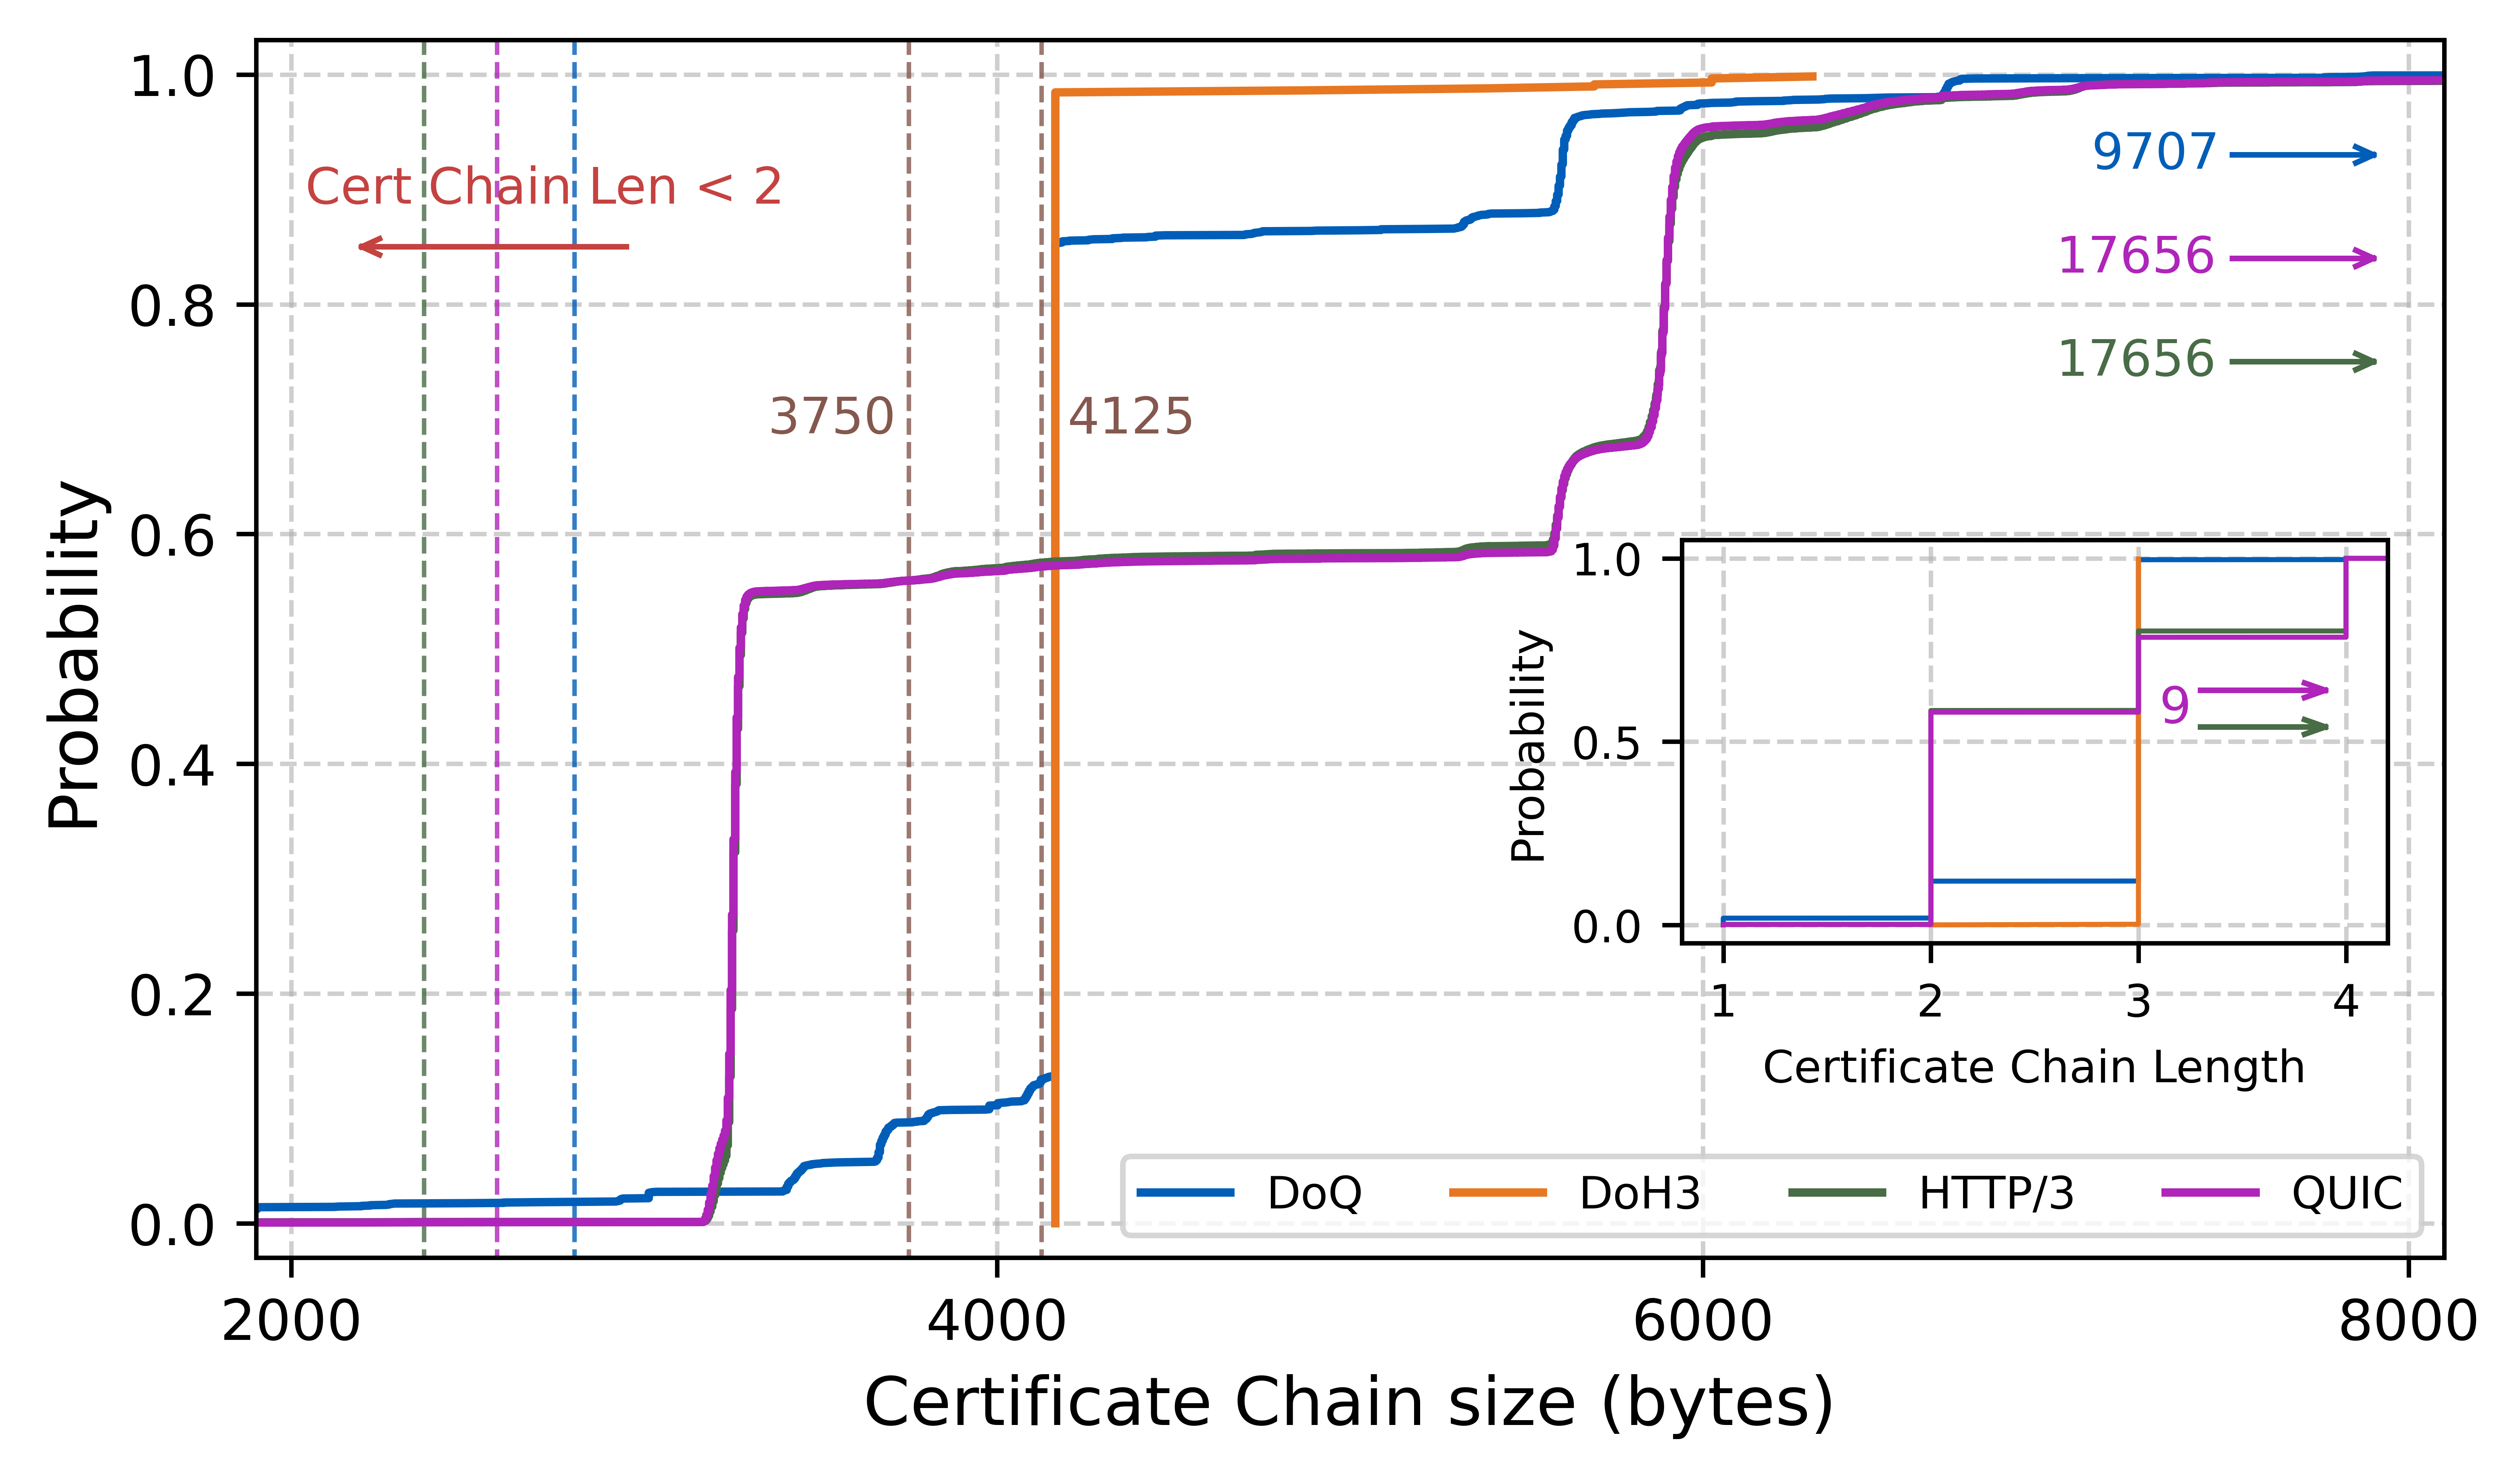

In [640]:
fig, ax = plt.subplots(figsize=(7,4),dpi=1000)
colors = ["#af24b9", '#84584e', '#c44240', '#486c46', TUMBlue, TUMOrange] 

# sample1 = raw_doq[raw_doq["certLen"]!=1]["certChainSize"]
# sample2 = raw_quic[raw_quic["certLen"]!=1]["certChainSize"]
# sample3 = raw_http3[raw_http3["certLen"]!=1]["certChainSize"]
sample1 = raw_doq["certChainSize"]
sample2 = raw_doh3["certChainSize"]
sample3 = raw_quic["certChainSize"]
sample4 = raw_http3["certChainSize"]

s1 = np.sort(sample1)
s2 = np.sort(sample2)
s3 = np.sort(sample3)
s4 = np.sort(sample4)


# 证书大小剪头
# DoQ
ax.plot([7500,7900],[0.93,0.93],color=colors[4],linewidth=1)
ax.plot([7850,7900],[0.937,0.93],color=colors[4],linewidth=1)
ax.plot([7850,7900],[0.923,0.93],color=colors[4],linewidth=1)
ax.text(7100,0.93,"9707",fontsize=9,va='center',color = colors[4])

# QUIC
ax.plot([7500,7900],[0.84,0.84],color=colors[0],linewidth=1)
ax.plot([7850,7900],[0.847,0.84],color=colors[0],linewidth=1)
ax.plot([7850,7900],[0.833,0.84],color=colors[0],linewidth=1)
ax.text(7000,0.84,"17656",fontsize=9,va='center',color = colors[0])

# HTTP/3
ax.plot([7500,7900],[0.75,0.75],color=colors[3],linewidth=1)
ax.plot([7850,7900],[0.757,0.75],color=colors[3],linewidth=1)
ax.plot([7850,7900],[0.743,0.75],color=colors[3],linewidth=1)
ax.text(7000,0.75,"17656",fontsize=9,va='center',color = colors[3])


# max cert size
plt.plot([3750,3750], [-1,2],color = color_list[1],linestyle="--",alpha=0.8,linewidth=0.8)
ax.text(3350,0.7,"3750",fontsize=9,va='center',color = color_list[1])

plt.plot([4125,4125], [-1,2],color = color_list[1],linestyle="--",alpha=0.8,linewidth=0.8)
ax.text(4200,0.7,"4125",fontsize=9,va='center',color = color_list[1])


#cert len < 1
plt.plot([2802,2802], [-1,2],color = color_list[4],linestyle="--",alpha=0.8,linewidth=0.8)
# ax.text(2802,0.7,"2802",fontsize=9,va='center',color = color_list[4])

plt.plot([2583,2583], [-1,2],color = color_list[0],linestyle="--",alpha=0.8,linewidth=0.8)
# ax.text(2583,0.7,"2583",fontsize=9,va='center',color = color_list[5])

plt.plot([2376,2376], [-1,2],color = color_list[3],linestyle="--",alpha=0.8,linewidth=0.8)
# ax.text(2376,0.7,"2376",fontsize=9,va='center',color = color_list[3])


ax.plot([2200,2950],[0.85,0.85],color=colors[2],linewidth=1)
ax.plot([2200,2250],[0.85,0.857],color=colors[2],linewidth=1)
ax.plot([2200,2250],[0.85,0.843],color=colors[2],linewidth=1)
ax.text(2040,0.9,"Cert Chain Len < 2",fontsize=9,va='center',color = color_list[2])



ax.plot(s1,np.arange(len(s1))/float(len(s1)),color = colors[4],label="DoQ")
ax.plot(s2,np.arange(len(s2))/float(len(s2)),color = colors[5],label="DoH3")
ax.plot(s4,np.arange(len(s4))/float(len(s4)),color = colors[3],label="HTTP/3")
ax.plot(s3,np.arange(len(s3))/float(len(s3)),color = colors[0],label="QUIC")


plt.legend(fontsize=8,loc =0,ncol=4)

plt.xlim(1900,8100)
plt.xticks(np.arange(2000,8001,2000))
plt.ylim(-0.03,1.03)
plt.yticks(np.arange(0,1.1,0.2))
plt.grid(linestyle = "--",alpha=0.6)

plt.xlabel('Certificate Chain size (bytes)',fontsize=12)
plt.ylabel('Probability',fontsize=12)




inset_ax = fig.add_axes([0.63, 0.32, 0.25, 0.25],facecolor="white")
sample1 = raw_doq["certLen"]
sample2 = raw_doh3["certLen"]
sample3 = raw_quic["certLen"]
sample4 = raw_http3["certLen"]

s1 = np.sort(sample1)
s2 = np.sort(sample2)
s3 = np.sort(sample3)
s4 = np.sort(sample4)


inset_ax.plot(s1,np.arange(len(s1))/float(len(s1)),color = colors[4],label="DoQ",linewidth=0.9)
inset_ax.plot(s2,np.arange(len(s2))/float(len(s2)),color = colors[5],label="DoH3",linewidth=0.9)
inset_ax.plot(s4,np.arange(len(s4))/float(len(s4)),color = colors[3],label="HTTP/3",linewidth=0.9)
inset_ax.plot(s3,np.arange(len(s3))/float(len(s3)),color = colors[0],label="QUIC",linewidth=0.9)


inset_ax.grid(linestyle = "--",alpha=0.6)

inset_ax.set_xlim(0.8,4.2)
inset_ax.set_xticks(np.arange(1,4.2,1))
inset_ax.set_ylim(-0.05,1.05)
inset_ax.set_yticks(np.arange(0,1.05,0.5))

inset_ax.tick_params(labelsize=8)
inset_ax.set_xlabel('Certificate Chain Length',fontsize=8)
inset_ax.set_ylabel('Probability',fontsize=8)

# QUIC
inset_ax.plot([3.3,3.9],[0.64,0.64],color=colors[0],linewidth=1)
inset_ax.plot([3.8,3.9],[0.66,0.64],color=colors[0],linewidth=1)
inset_ax.plot([3.8,3.9],[0.62,0.64],color=colors[0],linewidth=1)
inset_ax.text(3.1,0.59,"9",fontsize=9,va='center',color = colors[0])

# HTTP/3
inset_ax.plot([3.3,3.9],[0.54,0.54],color=colors[3],linewidth=1)
inset_ax.plot([3.8,3.9],[0.56,0.54],color=colors[3],linewidth=1)
inset_ax.plot([3.8,3.9],[0.52,0.54],color=colors[3],linewidth=1)
# inset_ax.text(7000,0.75,"17656",fontsize=9,va='center',color = colors[3])


plt.savefig("../fig/dox_cert_size.pdf",bbox_inches = 'tight')

plt.show()

## 叶子与非叶子证书的字段的树状热力图 

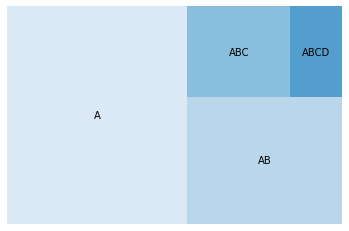

In [346]:
import matplotlib.pyplot as plt
import squarify
import seaborn as sns

labels = ['A', 'AB', 'ABC', 'ABCD']
sizes = [500, 250, 120, 60]
color = ['red', 'green', 'blue', 'orange']

norm = matplotlib.colors.Normalize(vmin=min(sizes), vmax=max(sizes))
colors = [matplotlib.cm.Blues(norm(value)) for value in sizes]
squarify.plot(sizes,label = labels,color=sns.color_palette("Blues"))
plt.axis('off')
plt.show()


## 叶子与非叶子证书的字段的箱型图

In [378]:
from numpy import *

doq_leaf_data_dict = {"Subject":mean(doq_leaf_Subject_list),"Issuer":mean(doq_leaf_Issuer_list),"PublicKeyInfo":mean(doq_leaf_PkInfo_list),
                     "Signature":mean(doq_leaf_Signt_list),"Extensions":mean(doq_leaf_Exten_list),"Other":mean(doq_leaf_other_list)}

doq_non_leaf_data_dict = {"Subject":mean(doq_non_leaf_Subject_list),"Issuer":mean(doq_non_leaf_Issuer_list),"PublicKeyInfo":mean(doq_non_leaf_PkInfo_list),
                     "Signature":mean(doq_non_leaf_Signt_list),"Extensions":mean(doq_non_leaf_Exten_list),"Other":mean(doq_non_leaf_other_list)}


doh3_leaf_data_dict = {"Subject":mean(doh3_leaf_Subject_list),"Issuer":mean(doh3_leaf_Issuer_list),"PublicKeyInfo":mean(doh3_leaf_PkInfo_list),
                     "Signature":mean(doh3_leaf_Signt_list),"Extensions":mean(doh3_leaf_Exten_list),"Other":mean(doh3_leaf_other_list)}

doh3_non_leaf_data_dict = {"Subject":mean(doh3_non_leaf_Subject_list),"Issuer":mean(doh3_non_leaf_Issuer_list),"PublicKeyInfo":mean(doh3_non_leaf_PkInfo_list),
                     "Signature":mean(doh3_non_leaf_Signt_list),"Extensions":mean(doh3_non_leaf_Exten_list),"Other":mean(doh3_non_leaf_other_list)}


quic_leaf_data_dict = {"Subject":mean(quic_leaf_Subject_list),"Issuer":mean(quic_leaf_Issuer_list),"PublicKeyInfo":mean(quic_leaf_PkInfo_list),
                     "Signature":mean(quic_leaf_Signt_list),"Extensions":mean(quic_leaf_Exten_list),"Other":mean(quic_leaf_other_list)}

quic_non_leaf_data_dict = {"Subject":mean(quic_non_leaf_Subject_list),"Issuer":mean(quic_non_leaf_Issuer_list),"PublicKeyInfo":mean(quic_non_leaf_PkInfo_list),
                     "Signature":mean(quic_non_leaf_Signt_list),"Extensions":mean(quic_non_leaf_Exten_list),"Other":mean(quic_non_leaf_other_list)}


http3_leaf_data_dict = {"Subject":mean(http3_leaf_Subject_list),"Issuer":mean(http3_leaf_Issuer_list),"PublicKeyInfo":mean(http3_leaf_PkInfo_list),
                     "Signature":mean(http3_leaf_Signt_list),"Extensions":mean(http3_leaf_Exten_list),"Other":mean(http3_leaf_other_list)}

http3_non_leaf_data_dict = {"Subject":mean(http3_non_leaf_Subject_list),"Issuer":mean(http3_non_leaf_Issuer_list),"PublicKeyInfo":mean(http3_non_leaf_PkInfo_list),
                     "Signature":mean(http3_non_leaf_Signt_list),"Extensions":mean(http3_non_leaf_Exten_list),"Other":mean(http3_non_leaf_other_list)}

In [388]:
http3_leaf_data_dict

{'Subject': 79.24575921123022,
 'Issuer': 70.43769003135306,
 'PublicKeyInfo': 147.35246795284175,
 'Signature': 127.20467519451762,
 'Extensions': 686.107169218476,
 'Other': 732.5483602283424}

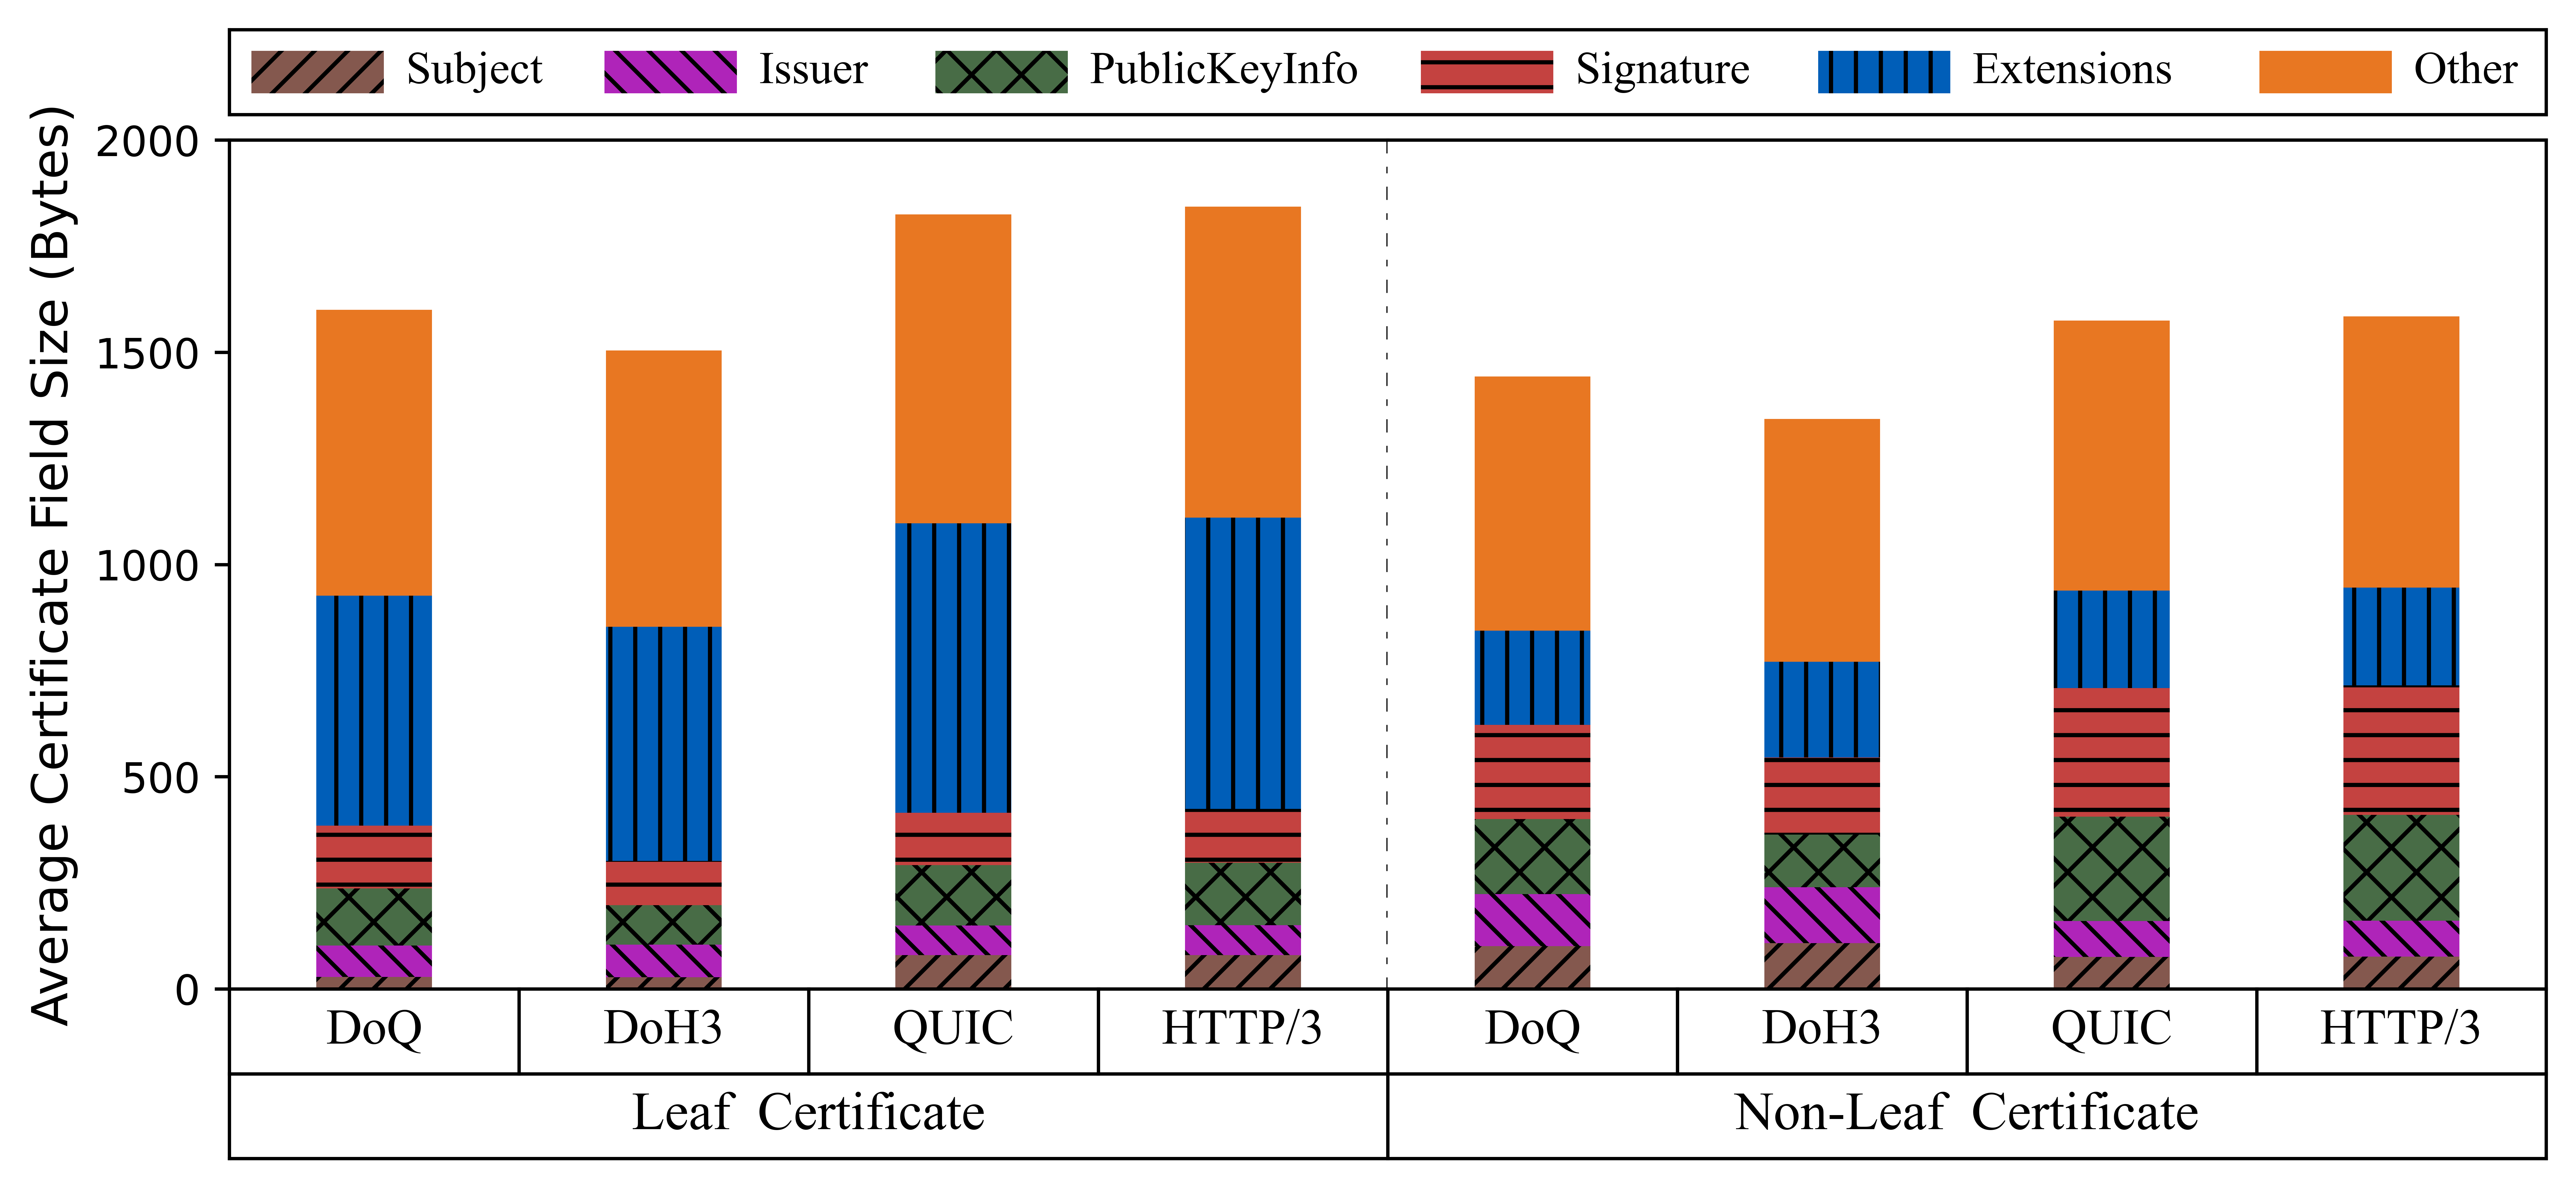

In [641]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.patches as mpatch
TUMBlue="#005eb8"
TUMOrange="#e87722"
font_times = {'family' : 'Times New Roman'}
colors = ['#84584e', "#af24b9", '#486c46', '#c44240',  TUMBlue, TUMOrange] 

box_line_list = []
dns_line_list = []
type_line_list = []


field_text_list = ['Subject', 'Issuer', 'PublicKeyInfo', 'Signature', 'Extensions','Other']
type_text_list = ['Leaf  Certificate', 'Non-Leaf  Certificate']
dns_text_list = ['DoQ', 'DoH3', 'QUIC', "HTTP/3"]
hatch_par = ['///', '\\\\\\', 'xx', '--','||','']

fig, axes=plt.subplots(dpi=1000,constrained_layout=False,figsize=(10,5),sharey=False)
fig.subplots_adjust(wspace=0,hspace=0)

gs=GridSpec(5,8,figure=fig,height_ratios=[1,0.3, 10,1,1])

axes.spines['top'].set_visible(False)
axes.spines['left'].set_visible(False)
axes.spines['right'].set_visible(False)

# 划分空白画布
i = 0
j = 0
while j < 8:
    if i < 8:
        ax_1 = fig.add_subplot(gs[2,i:i+4])
        box_line_list.append(ax_1)
        ax_3 = fig.add_subplot(gs[4,i:i+4])
        type_line_list.append(ax_3)
    
    ax_2 = fig.add_subplot(gs[3,j])
    dns_line_list.append(ax_2)
    
    i = i+4
    j = j+1

    
for index in range(len(box_line_list)):
    N = 4
    ind = np.arange(N)
    width = 0.4
    
    plt_data_list = []
    
    for field in field_text_list:
        if index == 0:
            temp_list = [doq_leaf_data_dict[field],doh3_leaf_data_dict[field],quic_leaf_data_dict[field],http3_leaf_data_dict[field]]
        else:
            temp_list = [doq_non_leaf_data_dict[field],doh3_non_leaf_data_dict[field],quic_non_leaf_data_dict[field],http3_non_leaf_data_dict[field]]
        
        plt_data_list.append(temp_list)
    

    for field_index in range(len(field_text_list)):
#         temp_bottom = []
        if field_index == 0:
            temp_bottom = [0,0,0,0]
        elif field_index == 1:
            temp_bottom = plt_data_list[0]
        else:
            temp_bottom = plt_data_list[field_index-1]
            for temp_i in range(field_index-1):
                temp_bottom = np.add(temp_bottom,plt_data_list[temp_i])
            
        box_line_list[index].bar(ind,plt_data_list[field_index],width,color=colors[field_index],bottom=temp_bottom,hatch=hatch_par[field_index],label=field_text_list[field_index])
#         box_line_list[index].legend()
#         for bar,mark in zip(bars,hatch_par):
#             bar.set_hatch(mark,linewidth=1)
    
        box_line_list[index].set_ylim(0,2000)
        my_y_ticks = np.arange(0,2001,500)
        box_line_list[index].set_yticks(my_y_ticks)
        
        box_line_list[index].set_xlim(-0.5,3.5)
        my_x_ticks = np.arange(0,3,1)
        box_line_list[index].set_xticks(my_x_ticks)
       
box_line_list[0].spines['right'].set_linestyle((0, (3, 5, 1, 5)))
box_line_list[0].spines['right'].set_alpha(0.8)
box_line_list[1].spines['left'].set_visible(False)

      
for index in range(len(box_line_list)):
    if index == 0:
        continue
    box_line_list[index].set_yticks([])
         
for index in range(len(dns_line_list)):
    dns_line_list[index].text(0.5,0.5,dns_text_list[index % len(dns_text_list)],fontsize=12,ha='center',va='center',family='Times New Roman')
    dns_line_list[index].set_yticks([])
    dns_line_list[index].set_xticks([])

for index in range(len(type_line_list)):
    type_line_list[index].text(0.5,0.5,type_text_list[index % len(type_text_list)],fontsize=13,ha='center',va='center',family='Times New Roman')
    type_line_list[index].set_yticks([])
    type_line_list[index].set_xticks([])
    
ax_0 = fig.add_subplot(gs[0,0:8])
ax_0.set_yticks([])
ax_0.set_xticks([])
ax_0.set_xlim(0,10.5)
ax_0.set_ylim(0,2)

rect = plt.Rectangle((0.1,0.5),0.6,1,facecolor=colors[0],linewidth=0,hatch=hatch_par[0])
ax_0.add_patch(rect)
ax_0.text(0.8,1,"Subject",fontsize=11,va='center',family='Times New Roman')

rect = plt.Rectangle((1.7,0.5),0.6,1,facecolor=colors[1],linewidth=0,hatch=hatch_par[1])
ax_0.add_patch(rect)
ax_0.text(2.4,1,"Issuer",fontsize=11,va='center',family='Times New Roman')

rect = plt.Rectangle((3.2,0.5),0.6,1,facecolor=colors[2],linewidth=0,hatch=hatch_par[2])
ax_0.add_patch(rect)
ax_0.text(3.9,1,"PublicKeyInfo",fontsize=11,va='center',family='Times New Roman')

rect = plt.Rectangle((5.4,0.5),0.6,1,facecolor=colors[3],linewidth=0,hatch=hatch_par[3])
ax_0.add_patch(rect)
ax_0.text(6.1,1,"Signature",fontsize=11,va='center',family='Times New Roman')

rect = plt.Rectangle((7.2,0.5),0.6,1,facecolor=colors[4],linewidth=0,hatch=hatch_par[4])
ax_0.add_patch(rect)
ax_0.text(7.9,1,"Extensions",fontsize=11,va='center',family='Times New Roman')

rect = plt.Rectangle((9.2,0.5),0.6,1,facecolor=colors[5],linewidth=0,hatch=hatch_par[5])
ax_0.add_patch(rect)
ax_0.text(9.9,1,"Other",fontsize=11,va='center',family='Times New Roman')

axes.set_xticks([])
axes.set_yticks([]) 
box_line_list[0].set_ylabel('Average Certificate Field Size (Bytes)',fontsize=12)
plt.savefig("../fig/dox_cert_field.pdf",bbox_inches = 'tight')
    
plt.show()


[0, 0, 0, 0]
[27.957799767171128, 26.97573656845754, 79.25106614050117, 79.24575921123022]
[102.03405122 104.00866551 149.17325076 149.68344924]
[236.55180442 196.91854419 291.53166589 297.0359172 ]
[384.5104773  301.49740035 415.17644333 424.24059239]


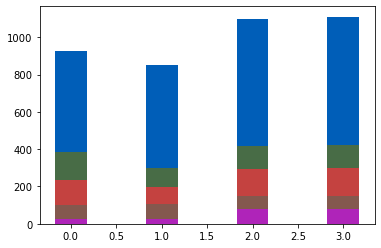

In [392]:
plt_data_list = [[27.957799767171128, 26.97573656845754, 79.25106614050117, 79.24575921123022], [74.07625145518044, 77.03292894280763, 69.92218461668095, 70.43769003135306], [134.51775320139697, 92.90987868284229, 142.35841513708857, 147.35246795284175], [147.95867287543655, 104.578856152513, 123.64477743293028, 127.20467519451762], [541.7066356228172, 551.8110918544194, 681.94108257147, 686.107169218476]]

for field_index in range(5):
#         temp_bottom = []
    if field_index == 0:
        temp_bottom = [0,0,0,0]
    elif field_index == 1:
        temp_bottom = plt_data_list[0]
    else:
        temp_bottom = plt_data_list[field_index-1]
        for temp_i in range(field_index-1):
            temp_bottom = np.add(temp_bottom,plt_data_list[temp_i])
    print(temp_bottom)        
    plt.bar(ind,plt_data_list[field_index],width,color=colors[field_index],bottom=temp_bottom)


## 各个证书字段大小CDF图 

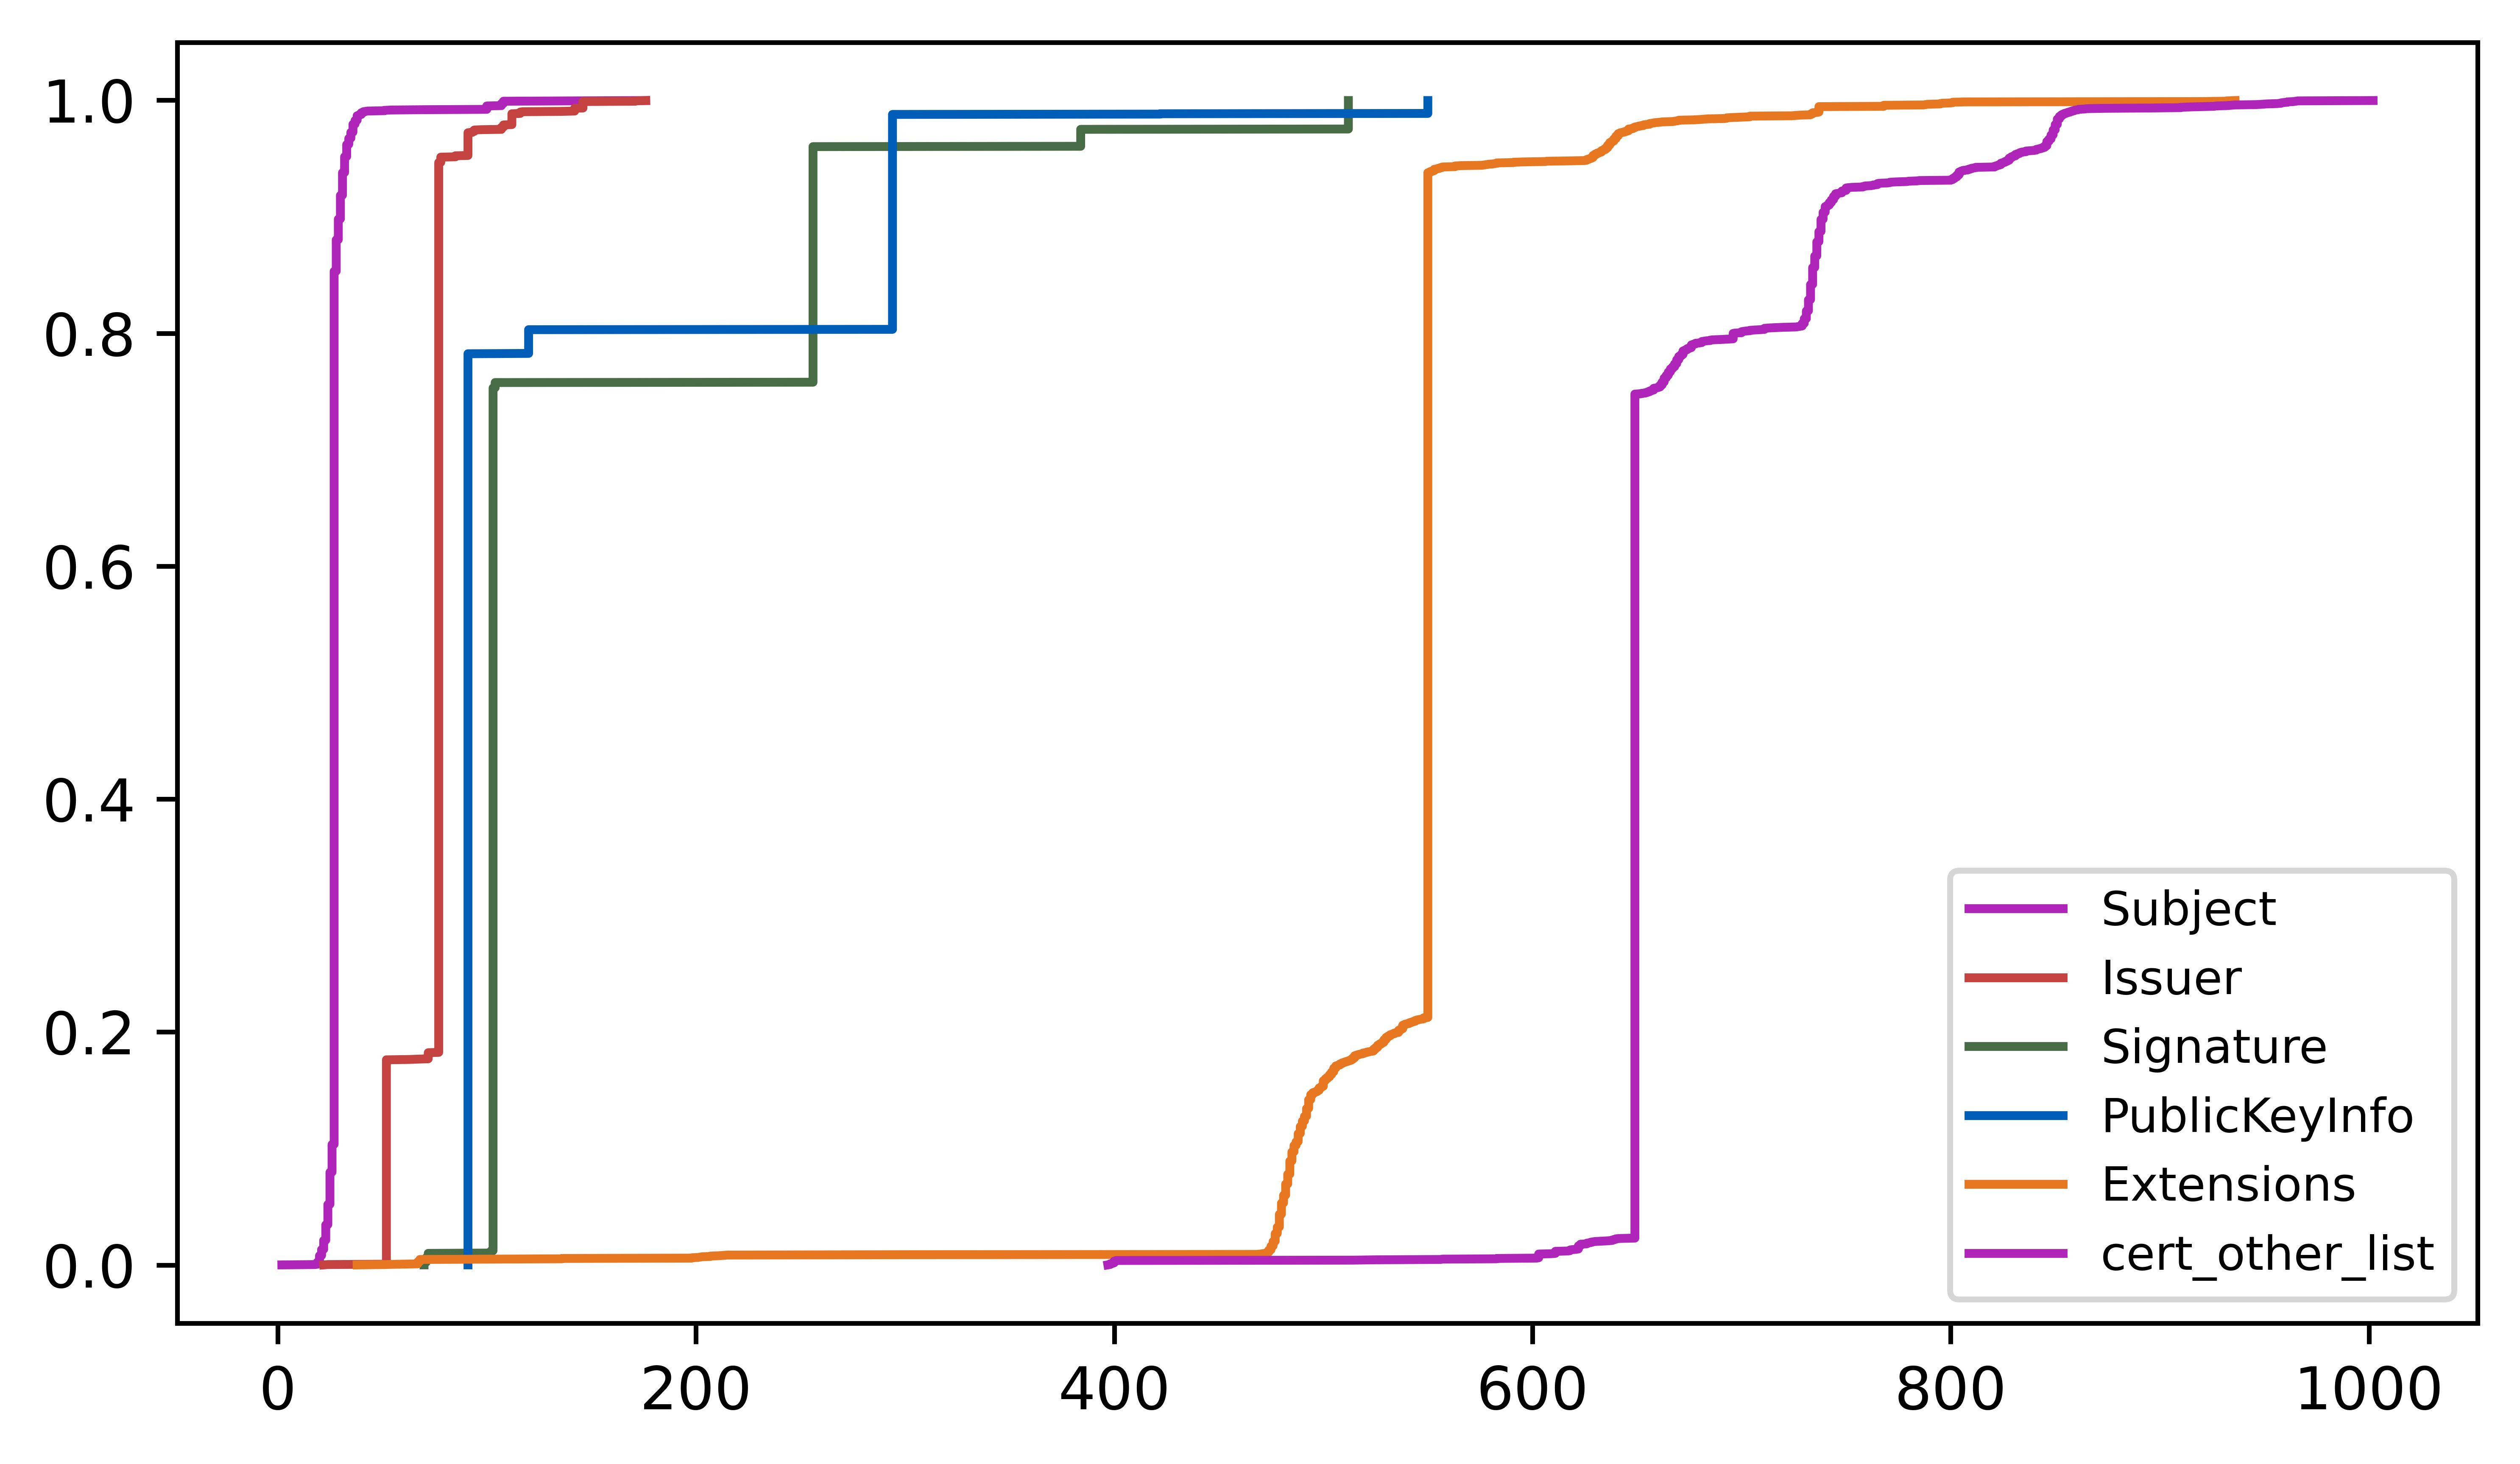

In [349]:
years = 30*12
months = 30

fig, ax = plt.subplots(figsize=(7,4),dpi=1000)

sample1 = all_raw[all_raw["certLen"]!=1]["certChainSize"]
                  
s1 = np.sort(sample1)
s2= np.sort(doq_leaf_Subject_list)
s3= np.sort(doq_leaf_Issuer_list)
s4= np.sort(doq_leaf_Signt_list)
s5= np.sort(doq_leaf_PkInfo_list)
s6= np.sort(doq_leaf_Exten_list)
s7= np.sort(doq_leaf_other_list)


color_list = ["#af24b9", '#84584e', '#c44240', '#486c46', TUMBlue, TUMOrange] 
# color_list = ["#118e32","#4c395f","#a82e2a","#1c5f52","#387085",TUMBlue]
#eba871
#387085
# plt.plot([3750,3750], [-1,2],color="gray",linestyle="--",alpha=0.8,linewidth=0.8)


# ax.plot(s1,np.arange(len(s1))/float(len(s1)),color = TUMBlue,label="certchain")
ax.plot(s2,np.arange(len(s2))/float(len(s2)),color =color_list[0],label="Subject")
ax.plot(s3,np.arange(len(s3))/float(len(s3)),color =color_list[2],label="Issuer")
ax.plot(s4,np.arange(len(s4))/float(len(s4)),color =color_list[3],label="Signature")
ax.plot(s5,np.arange(len(s5))/float(len(s5)),color =color_list[4],label="PublicKeyInfo")
ax.plot(s6,np.arange(len(s6))/float(len(s6)),color =color_list[5],label="Extensions")
ax.plot(s7,np.arange(len(s7))/float(len(s7)),color =color_list[0],label="cert_other_list")


#plt.xscale("log")
# plt.xlabel('Months',weight='bold',fontproperties=font3)
# plt.ylabel('ECDF: Pr[x] ≤ X',weight='bold',fontproperties=font3)
#x1, x2, y1, y2 = plt.axis()
#plt.axis((x1, 1000, y1, y2))a
# axes = plt.gca()
# axes.set_xlim([0, 24])
# plt.xticks(np.arange(0, 24+1, 6),fontproperties=font3)
# plt.yticks(fontproperties=font3)
# plt.legend(loc =6,bbox_to_anchor=(0.92, 0.7))
plt.legend(fontsize=8,loc =0)


# plt.ylim(-0.03,1.03)
# plt.yticks(np.arange(0,1.1,0.2))
plt.show()

## 叶证书和非叶证书 

In [17]:
sample2 = medium_cert_list + root_cert_list
type(sample2)

list

In [18]:
type(leaf_cert_list)

list

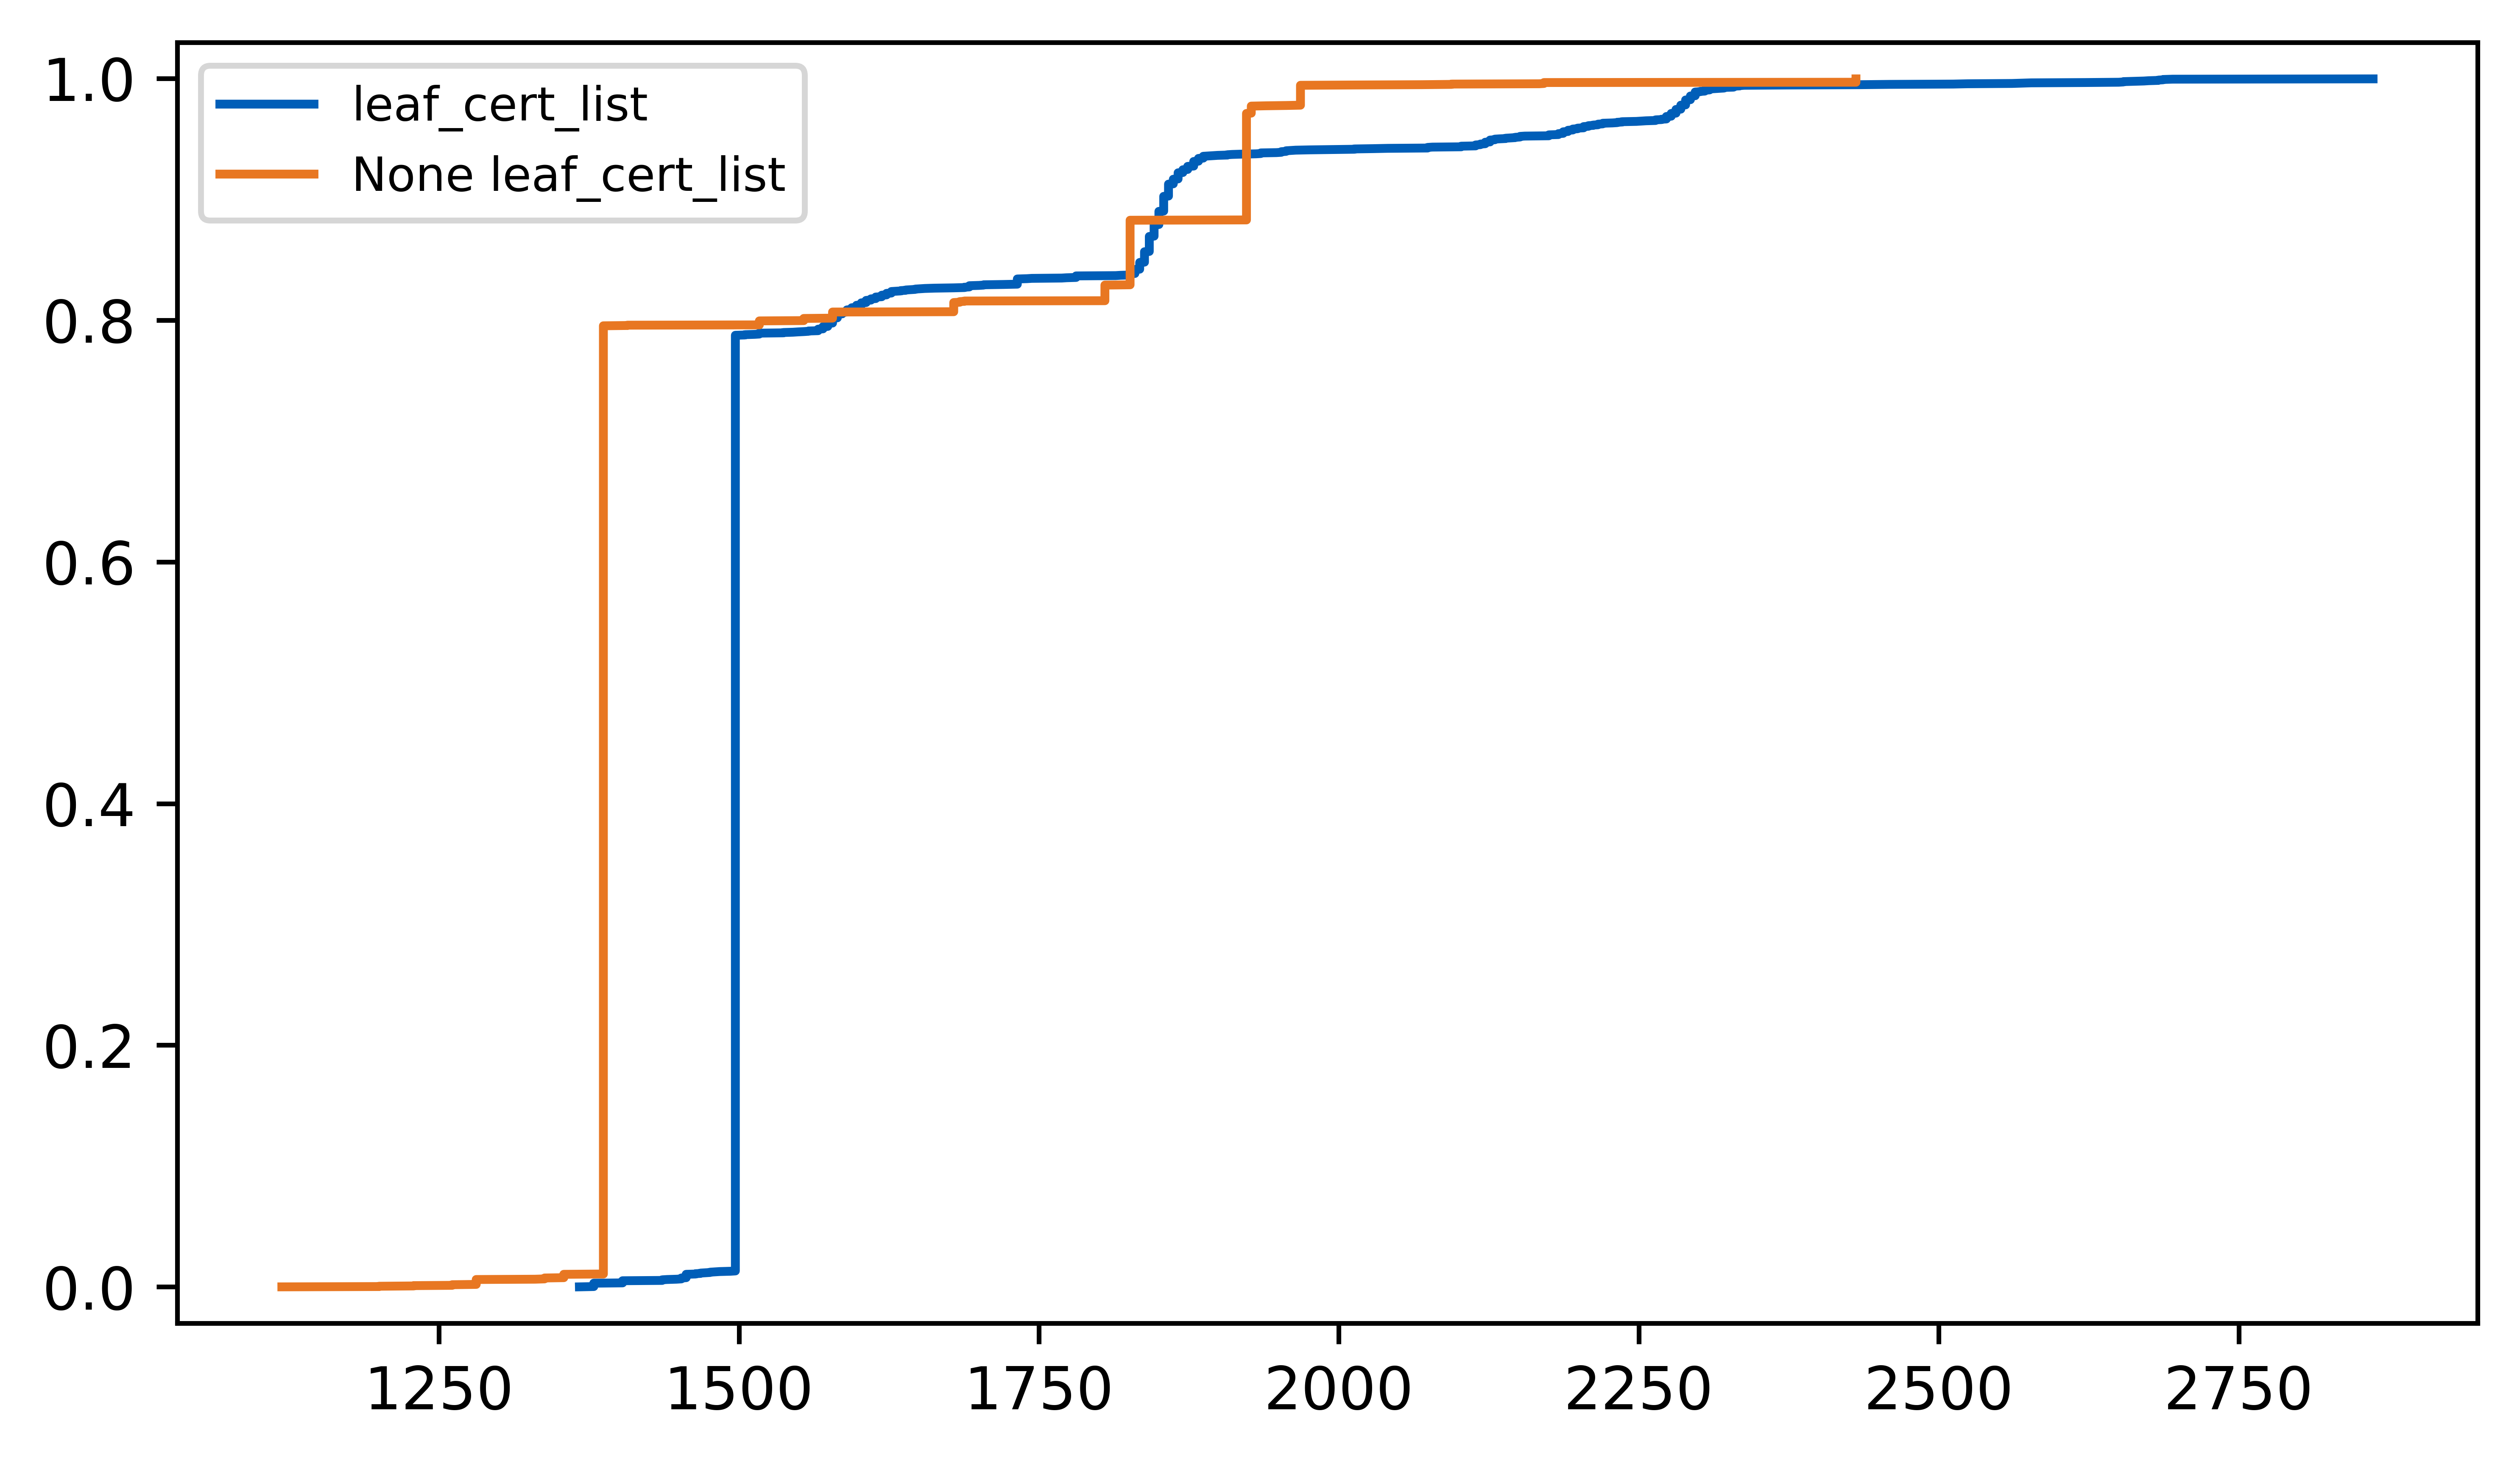

In [19]:
fig, ax = plt.subplots(figsize=(7,4),dpi=1000)


# sample2 = np.array(medium_cert_list + root_cert_list)

s1= np.sort(leaf_cert_list)
s2 = np.sort(root_cert_list)



color_list = ["#af24b9", '#84584e', '#c44240', '#486c46', TUMBlue, TUMOrange] 
# color_list = ["#118e32","#4c395f","#a82e2a","#1c5f52","#387085",TUMBlue]
#eba871
#387085
# plt.plot([3750,3750], [-1,2],color="gray",linestyle="--",alpha=0.8,linewidth=0.8)


ax.plot(s1,np.arange(len(s1))/float(len(s1)),color = TUMBlue,label="leaf_cert_list")
ax.plot(s2,np.arange(len(s2))/float(len(s2)),color = TUMOrange,label="None leaf_cert_list")

plt.legend(fontsize=8,loc =0)


plt.ylim(-0.03,1.03)
plt.yticks(np.arange(0,1.1,0.2))
plt.show()

In [20]:
leaf_cert_list = []
medium_cert_list = []
root_cert_list = []
for index,value in top_raw["eachCertSize"].iteritems():
    if len(value) == 1:
        continue
    
    leaf = value[0]
    leaf_cert_list.append(leaf)
    root = value[-1]
    root_cert_list.append(root)
    
    if len(value) > 2:
        medium = value[1:-1]
        for i in range(len(medium)):
            medium_cert_list.append(medium[i])

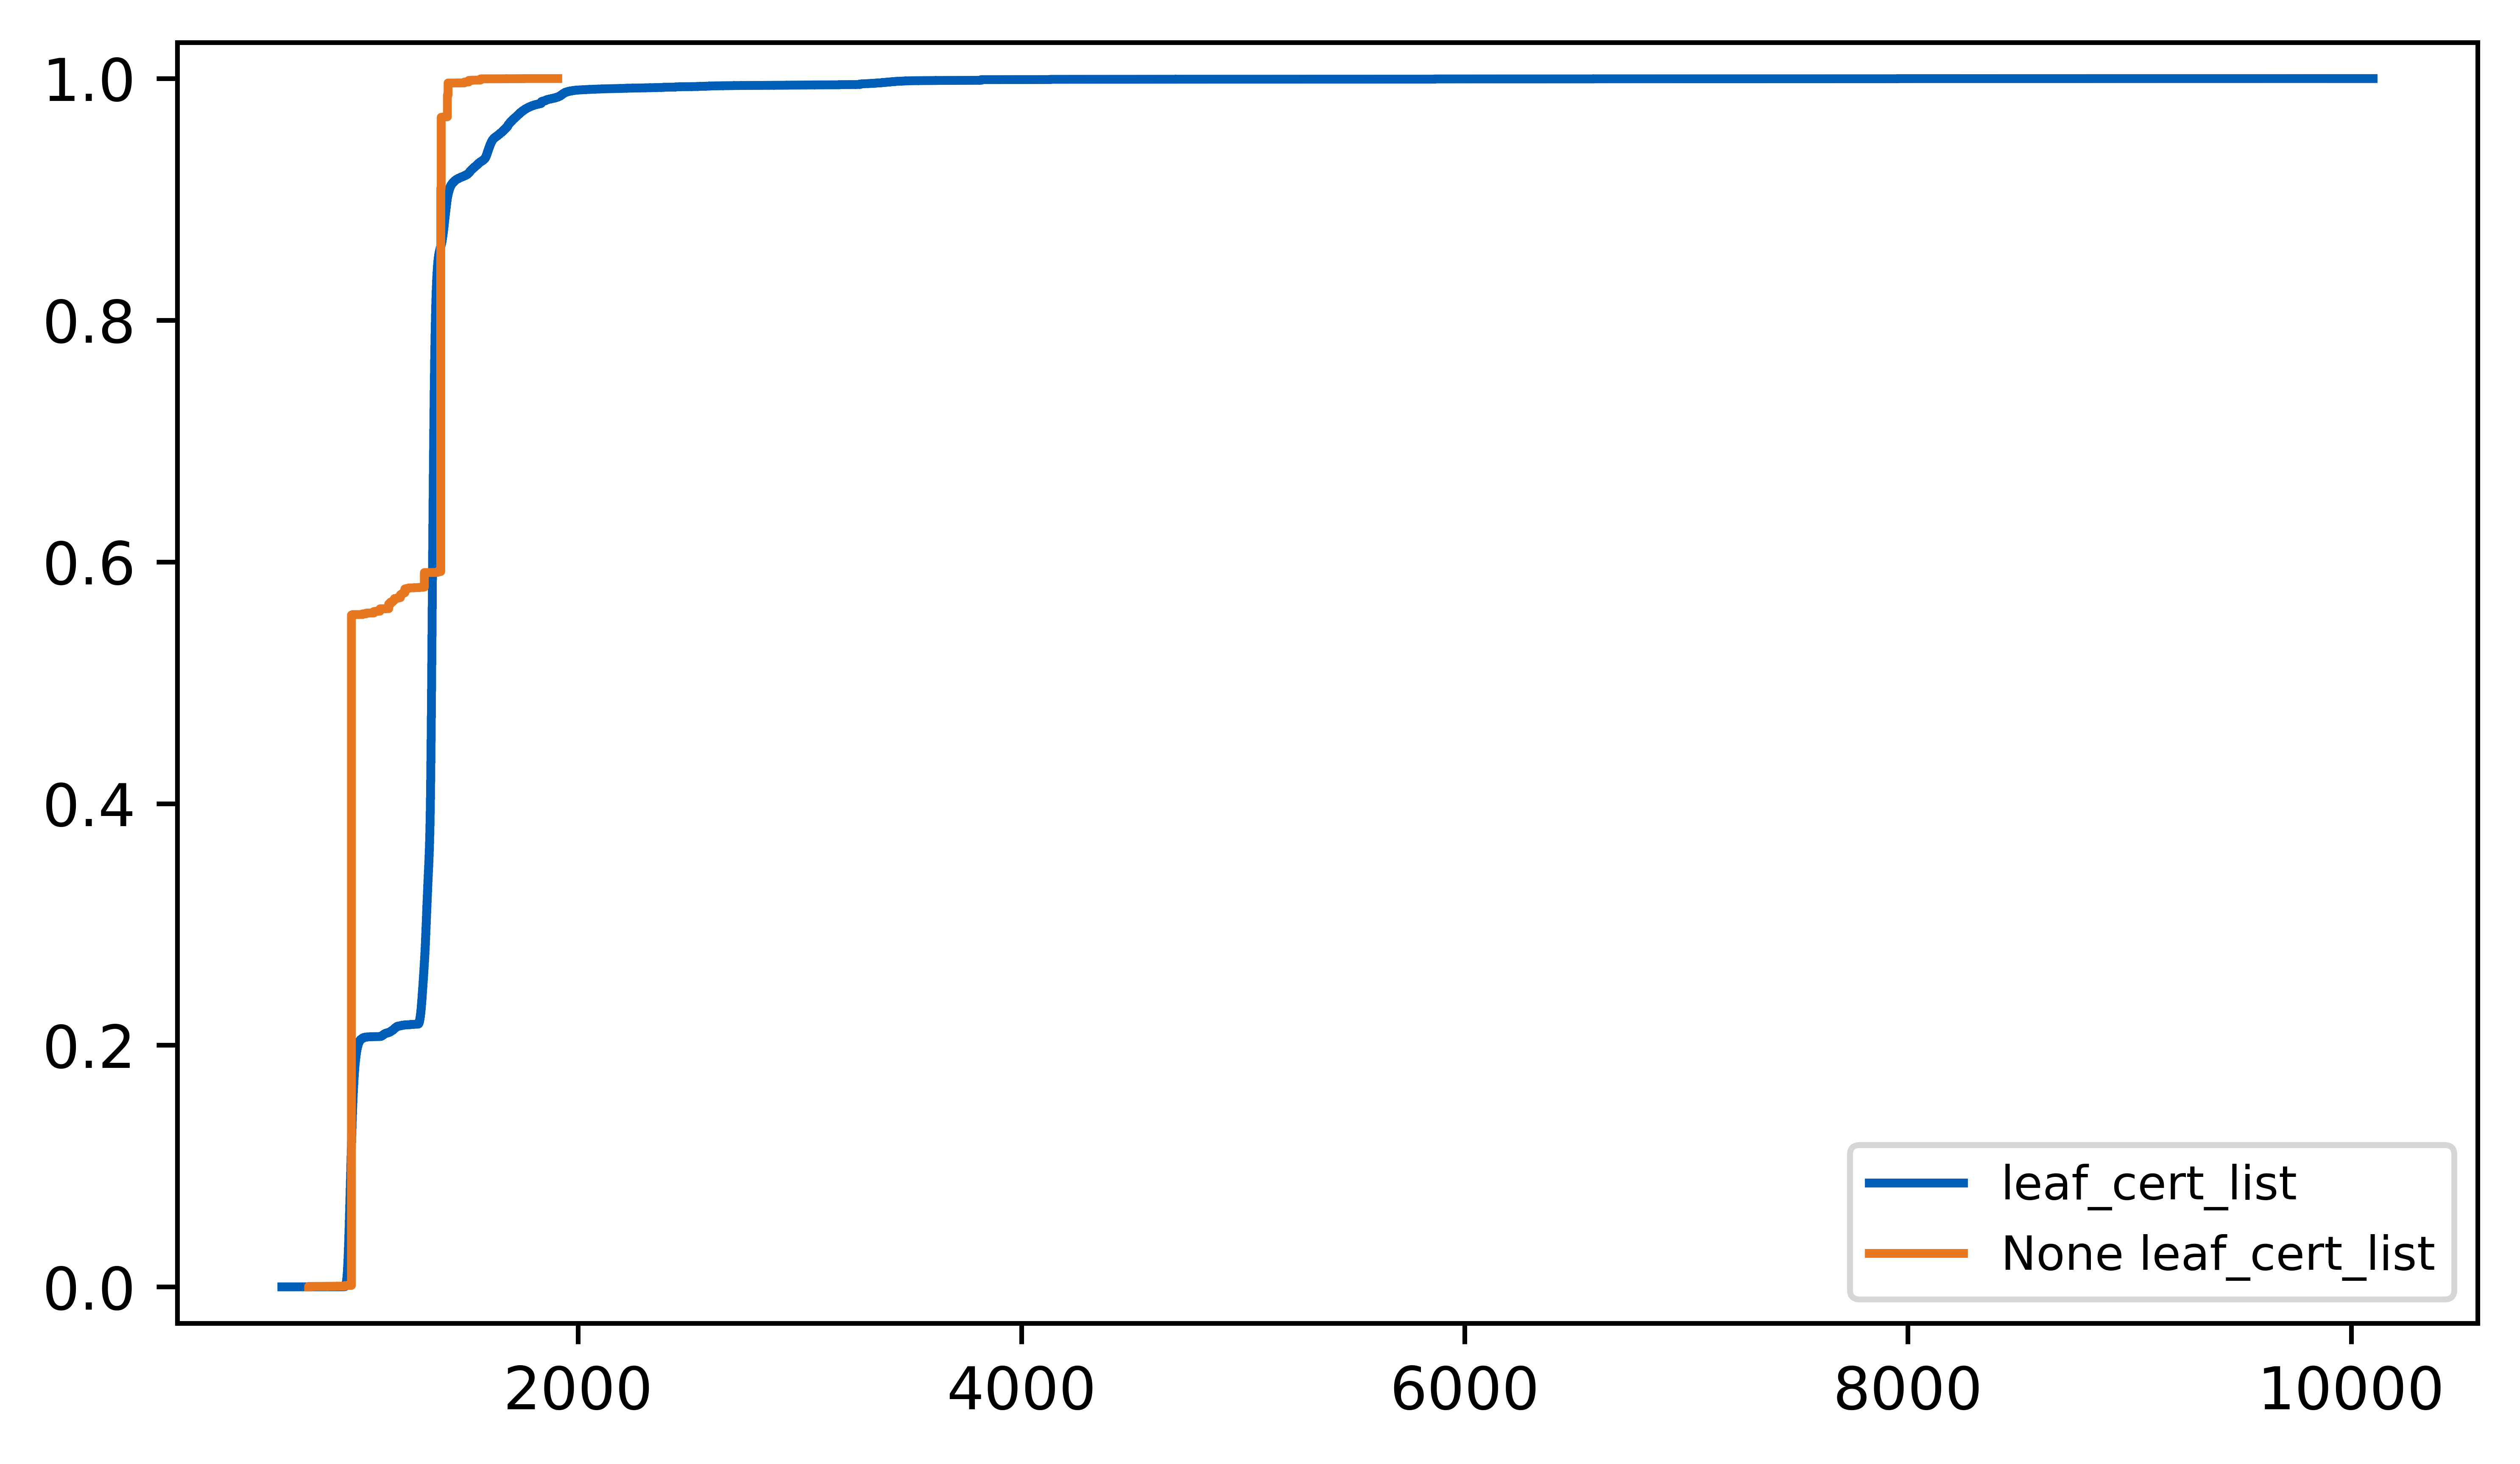

In [21]:
fig, ax = plt.subplots(figsize=(7,4),dpi=1000)


# sample2 = np.array(medium_cert_list + root_cert_list)

s1= np.sort(leaf_cert_list)
s2 = np.sort(root_cert_list)



color_list = ["#af24b9", '#84584e', '#c44240', '#486c46', TUMBlue, TUMOrange] 
# color_list = ["#118e32","#4c395f","#a82e2a","#1c5f52","#387085",TUMBlue]
#eba871
#387085
# plt.plot([3750,3750], [-1,2],color="gray",linestyle="--",alpha=0.8,linewidth=0.8)


ax.plot(s1,np.arange(len(s1))/float(len(s1)),color = TUMBlue,label="leaf_cert_list")
ax.plot(s2,np.arange(len(s2))/float(len(s2)),color = TUMOrange,label="None leaf_cert_list")

plt.legend(fontsize=8,loc =0)


plt.ylim(-0.03,1.03)
plt.yticks(np.arange(0,1.1,0.2))
plt.show()

## 签名算法

In [579]:
test = [1,2,3]
test[:1]

[1]

### 不同签名算法的证书大小

In [580]:
ECDSA_Cert = []
RSA_Cert = []
for row in raw_doq.iterrows():
    SignAlgo = row[1]['eachSignAlgo'][:1]
    certsize = row[1]['eachCertSize'][:1]
    
    for i in range(len(SignAlgo)):
        
        if SignAlgo[i] == "ECDSA-SHA384":
            ECDSA_Cert.append(certsize[i])
        elif SignAlgo[i] == "ECDSA-SHA256":
            ECDSA_Cert.append(certsize[i])
        elif SignAlgo[i] == "SHA256-RSA":
            RSA_Cert.append(certsize[i])
        elif SignAlgo[i] == "SHA384-RSA":
            RSA_Cert.append(certsize[i])
        elif SignAlgo[i] == "SHA1-RSA":
            RSA_Cert.append(certsize[i])

In [578]:
print(mean(ECDSA_Cert))
print(mean(RSA_Cert))

1097.7941176470588
1507.4512051734273


In [581]:
print(mean(ECDSA_Cert))
print(mean(RSA_Cert))

1494.552995391705
1928.9026442307693


In [22]:
pd_cert_SignAlgo = pd.DataFrame(cert_SignAlgo_list)
pd_cert_SignAlgo[0].value_counts()

ECDSA-SHA384    6277
SHA384-RSA      3393
SHA256-RSA      1845
ECDSA-SHA256      35
SHA1-RSA          25
Name: 0, dtype: int64

In [23]:
ECDSA_SHA384 = []
ECDSA_SHA256 = []
RSA_SHA384 = []
RSA_SHA256 = []
SHA1_RSA = []
for row in all_raw.iterrows():
    SignAlgo = row[1]['eachSignAlgo']
    SignAlgoSize = row[1]['eachSigntSize']
    
    for i in range(len(SignAlgo)):
        
        if SignAlgo[i] == "ECDSA-SHA384":
            ECDSA_SHA384.append(SignAlgoSize[i])
        elif SignAlgo[i] == "ECDSA-SHA256":
            ECDSA_SHA256.append(SignAlgoSize[i])
        elif SignAlgo[i] == "SHA256-RSA":
            RSA_SHA256.append(SignAlgoSize[i])
        elif SignAlgo[i] == "SHA384-RSA":
            RSA_SHA384.append(SignAlgoSize[i])
        elif SignAlgo[i] == "SHA1-RSA":
            SHA1_RSA.append(SignAlgoSize[i])

In [24]:
temp = pd.DataFrame(ECDSA_SHA384)
temp[0].value_counts()

102    3714
103    2547
104      16
Name: 0, dtype: int64

In [25]:
temp = pd.DataFrame(ECDSA_SHA256)
temp[0].value_counts()

71    14
72    13
70     8
Name: 0, dtype: int64

In [26]:
temp = pd.DataFrame(RSA_SHA384)
temp[0].value_counts()

256    3174
512     168
384      51
Name: 0, dtype: int64

In [27]:
temp = pd.DataFrame(RSA_SHA256)
temp[0].value_counts()

256    1219
512     626
Name: 0, dtype: int64

In [28]:
temp = pd.DataFrame(SHA1_RSA)
temp[0].value_counts()

256    25
Name: 0, dtype: int64

### 各级证书使用的签名算法

In [553]:
leaf_sign = []
medium_sign = []
root_sign = []

for row in raw_doq.iterrows():
    SignAlgo = row[1]['eachSignAlgo']
    
    if len(SignAlgo) == 1:
        continue
    
    leaf_sign.append(SignAlgo[0])
    root_sign.append(SignAlgo[-1])
    
    if len(SignAlgo) > 2:
        medium = SignAlgo[1:-1]
        for i in range(len(medium)):
            medium_sign.append(medium[i])

In [554]:
temp = pd.DataFrame(leaf_sign)
temp[0].value_counts()

ECDSA-SHA384    2569
SHA256-RSA       664
SHA384-RSA       120
ECDSA-SHA256      19
Name: 0, dtype: int64

In [555]:
temp = pd.DataFrame(medium_sign)
temp[0].value_counts()

ECDSA-SHA384    2552
SHA256-RSA       401
SHA384-RSA        84
Name: 0, dtype: int64

In [556]:
temp = pd.DataFrame(root_sign)
temp[0].value_counts()

SHA384-RSA      2611
SHA256-RSA       718
SHA1-RSA          25
ECDSA-SHA384      18
Name: 0, dtype: int64

### 签名长度

In [33]:
ECDSA_384 = []
ECDSA_256 = []
RSA_2048 = []
RSA_4096 = []
for i in range(len(ECDSA_SHA256)):
    if ECDSA_SHA256[i]>=70 and ECDSA_SHA256[i]<=74:
        ECDSA_256.append(ECDSA_SHA256[i])
    elif ECDSA_SHA256[i]>=100 and ECDSA_SHA256[i]<=104:
        ECDSA_384.append(ECDSA_SHA256[i])

for i in range(len(ECDSA_SHA384)):
    if ECDSA_SHA384[i]>=70 and ECDSA_SHA384[i]<=74:
        ECDSA_256.append(ECDSA_SHA384[i])
    elif ECDSA_SHA384[i]>=100 and ECDSA_SHA384[i]<=104:
        ECDSA_384.append(ECDSA_SHA384[i])

for i in range(len(RSA_SHA384)):
    if RSA_SHA384[i] == 256:
        RSA_2048.append(RSA_SHA384[i])
    elif RSA_SHA384[i] == 512:
        RSA_4096.append(RSA_SHA384[i])

for i in range(len(RSA_SHA256)):
    if RSA_SHA256[i] == 256:
        RSA_2048.append(RSA_SHA256[i])
    elif RSA_SHA256[i] == 512:
        RSA_4096.append(RSA_SHA256[i])        


In [34]:
print("ECDSA_384:",len(ECDSA_384))
print("ECDSA_256:",len(ECDSA_256))
print("RSA_2048:",len(RSA_2048))
print("RSA_4096:",len(RSA_4096))

ECDSA_384: 6277
ECDSA_256: 35
RSA_2048: 4393
RSA_4096: 794


In [560]:
max(RSA_4096)

512

## 分析扩展 

In [595]:
raw_doq

,ip,certLen,certChainSize,eachCertSize,eachSubjectSize,eachIssuerSize,eachSigntSize,eachPkInfoSize,eachExtenSize,eachSignAlgo,eachSubject,eachSANSize,eachSCTSize,eachex_value_size,eachOrganization
0,103.181.143.111,3,5595,"[1846, 1826, 1923]","[30, 52, 81]","[52, 81, 65]","[256, 512, 256]","[294, 294, 550]","[481, 177, 248]","[SHA256-RSA, SHA256-RSA, SHA256-RSA]","[d.apemlegit.my.id, R3, ISRG Root X1]","[17, 0, 0]",[244],[2.5.29.15:4###2.5.29.37:22###2.5.29.19:2###2....,"[unknown, Let's Encrypt, Internet Security Res..."
1,124.223.83.220,2,4090,"[2285, 1805]","[28, 91]","[91, 125]","[384, 256]","[294, 422]","[640, 207]","[SHA384-RSA, SHA256-RSA]","[dns.yyqsite.top, TrustAsia RSA DV TLS CA G2]","[15, 0]",[368],[2.5.29.35:24###2.5.29.14:22###2.5.29.15:4###2...,"[unknown, TrustAsia Technologies, Inc.]"
2,135.125.236.63,2,3676,"[1850, 1826]","[30, 52]","[52, 81]","[256, 512]","[294, 294]","[482, 177]","[SHA256-RSA, SHA256-RSA]","[dns.eliatofani.it, R3]","[17, 0]",[245],[2.5.29.15:4###2.5.29.37:22###2.5.29.19:2###2....,"[unknown, Let's Encrypt]"
3,140.238.48.65,3,5583,"[1834, 1826, 1923]","[24, 52, 81]","[52, 81, 65]","[256, 512, 256]","[294, 294, 550]","[477, 177, 248]","[SHA256-RSA, SHA256-RSA, SHA256-RSA]","[awan.ftp.sh, R3, ISRG Root X1]","[11, 0, 0]",[246],[2.5.29.15:4###2.5.29.37:22###2.5.29.19:2###2....,"[unknown, Let's Encrypt, Internet Security Res..."
4,141.147.154.127,3,5636,"[1887, 1826, 1923]","[34, 52, 81]","[52, 81, 65]","[256, 512, 256]","[294, 294, 550]","[505, 177, 248]","[SHA256-RSA, SHA256-RSA, SHA256-RSA]","[www.englishenglish.ml, R3, ISRG Root X1]","[38, 0, 0]",[245],[2.5.29.15:4###2.5.29.37:22###2.5.29.19:2###2....,"[unknown, Let's Encrypt, Internet Security Res..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3431,77.73.131.202,3,5587,"[1838, 1826, 1923]","[26, 52, 81]","[52, 81, 65]","[256, 512, 256]","[294, 294, 550]","[478, 177, 248]","[SHA256-RSA, SHA256-RSA, SHA256-RSA]","[ar1son.online, R3, ISRG Root X1]","[13, 0, 0]",[245],[2.5.29.15:4###2.5.29.37:22###2.5.29.19:2###2....,"[unknown, Let's Encrypt, Internet Security Res..."
3432,85.214.48.241,3,5583,"[1834, 1826, 1923]","[24, 52, 81]","[52, 81, 65]","[256, 512, 256]","[294, 294, 550]","[477, 177, 248]","[SHA256-RSA, SHA256-RSA, SHA256-RSA]","[dns.siry.de, R3, ISRG Root X1]","[11, 0, 0]",[246],[2.5.29.15:4###2.5.29.37:22###2.5.29.19:2###2....,"[unknown, Let's Encrypt, Internet Security Res..."
3433,87.106.171.107,1,2134,[2134],[25],[112],[256],[294],[641],[SHA256-RSA],[*.treiber.fr],[22],[368],[2.5.29.35:24###2.5.29.14:22###2.5.29.17:28###...,[unknown]
3434,94.140.14.140,2,3013,"[1732, 1281]","[28, 77]","[77, 139]","[103, 102]","[91, 120]","[737, 286]","[ECDSA-SHA384, ECDSA-SHA384]","[dns.adguard.com, ZeroSSL ECC Domain Secure Si...","[63, 0]",[366],[2.5.29.35:24###2.5.29.14:22###2.5.29.15:4###2...,"[unknown, ZeroSSL]"


### 叶子与非叶子证书的扩展数量

In [601]:
doq_leaf_exten_num = []
doq_non_leaf_exten_num = []


for row in raw_quic.iterrows():
    eachexten = row[1]['eachex_value_size']
    if len(eachexten) < 2:
        doq_leaf_exten_num.append(len(eachexten[0].split("###")))
        continue
    
    for i in range(len(eachexten)):
        if i == 0:
            doq_leaf_exten_num.append(len(eachexten[i].split("###")))
            
        else:
            doq_non_leaf_exten_num.append(len(eachexten[i].split("###")))
            
            

In [602]:
median(doq_leaf_exten_num)

11.0

In [603]:
median(doq_non_leaf_exten_num)

9.0

In [594]:
raw_doq['eachex_value_size'][0]

['2.5.29.15:4###2.5.29.37:22###2.5.29.19:2###2.5.29.14:22###2.5.29.35:24###1.3.6.1.5.5.7.1.1:73###2.5.29.17:21###2.5.29.32:69###1.3.6.1.4.1.11129.2.4.2:244###',
 '2.5.29.15:4###2.5.29.37:22###2.5.29.19:8###2.5.29.14:22###2.5.29.35:24###1.3.6.1.5.5.7.1.1:38###2.5.29.31:32###2.5.29.32:27###',
 '2.5.29.19:5###2.5.29.15:4###1.3.6.1.5.5.7.1.1:63###2.5.29.35:24###2.5.29.32:77###2.5.29.31:53###2.5.29.14:22###']

In [35]:
def mean(list_1):
    sum =0 
    for i in range(len(list_1)):
        sum = sum + list_1[i]
    return sum / len(list_1)

### 各级证书的扩展大小

In [36]:
leaf_exten = []
medium_exten = []
root_exten = []

for row in all_raw.iterrows():
    ExtensionSize = row[1]['eachExtenSize']
    
    if len(ExtensionSize) == 1:
        continue
    
    leaf_exten.append(ExtensionSize[0])
    root_exten.append(ExtensionSize[-1])
    
    if len(ExtensionSize) > 2:
        medium = ExtensionSize[1:-1]
        for i in range(len(medium)):
            medium_exten.append(medium[i])

In [37]:
temp = pd.DataFrame(leaf_exten)
temp[0].value_counts()

550    2493
551     572
479      38
484      38
482      33
       ... 
472       1
618       1
692       1
807       1
920       1
Name: 0, Length: 164, dtype: int64

In [38]:
temp = pd.DataFrame(root_exten)
temp[0].value_counts()

165    3166
248     385
177     212
207      60
286      29
234      24
152      21
147      14
31       11
213       8
172       4
55        4
296       3
279       2
302       2
484       1
5         1
167       1
299       1
Name: 0, dtype: int64

In [39]:
temp = pd.DataFrame(medium_exten)
temp[0].value_counts()

286    3164
177     374
287      24
279      12
165       7
207       7
215       3
299       3
297       3
213       3
248       2
302       2
31        2
240       1
285       1
434       1
528       1
543       1
536       1
265       1
Name: 0, dtype: int64

In [40]:
print("leaf:",mean(leaf_exten))
print("root:",mean(root_exten))
print("medium:",mean(medium_exten))

leaf: 546.3714864522664
root: 175.4702456318055
medium: 274.2892333241074


### SCT大小 

In [604]:
raw_doq["eachSCTSize"].value_counts()

[245]         2776
[246]          196
[244]          186
[366]           65
[243]           44
[247]           33
[367]           32
[365]           25
[368]           20
[364]           16
[363]            3
[369]            2
[245, 245]       2
[246, 246]       1
[607]            1
[244, 244]       1
[606]            1
[605]            1
Name: eachSCTSize, dtype: int64

In [607]:
raw_quic["eachSCTSize"].value_counts()

[366]         38618
[245]         33053
[365]         29366
[367]         29216
[246]         22232
[244]         22041
[364]         11861
[368]         11733
[243]          5622
[247]          5421
[363]          2145
[369]          1944
[242]            88
[362]            50
[486]            13
[485]             9
[608]             7
[487]             6
[484]             3
[488]             3
[366, 366]        3
[245, 245]        3
[246, 246]        2
[489]             2
[365, 365]        2
[607]             2
[244, 244]        2
[726]             2
[367, 367]        1
[848]             1
[843]             1
[483]             1
[846]             1
[728]             1
[609]             1
[367, 365]        1
Name: eachSCTSize, dtype: int64

In [623]:
eachSCTSize_list = []
sct_radio_list = []
for row in raw_doq.iterrows():
    sctSize = row[1]['eachSCTSize']
    extenSize = row[1]['eachExtenSize']
    if sctSize == None:
        continue
    eachSCTSize_list.append(sctSize[0])
    sct_radio_list.append(sctSize[0]/extenSize[0]*100)
    

In [624]:
print("SCT:",mean(eachSCTSize_list))
print("SCT:",mean(sct_radio_list))

SCT: 251.11042584434654
SCT: 46.04243979608903


### SAN大小 

In [610]:
raw_doq["eachSANSize"].value_counts()

[30, 0, 0]       2495
[18, 0, 0]         43
[22, 0, 0]         33
[14, 0]            31
[26, 0, 0]         30
                 ... 
[6, 0, 0]           1
[28, 0, 0, 0]       1
[127, 0, 0]         1
[15]                1
[36, 0, 0, 0]       1
Name: eachSANSize, Length: 138, dtype: int64

In [638]:
doq_leaf_san = []
san_radio_list = []


for row in raw_quic.iterrows():
    eachsan = row[1]['eachSANSize']
    extenSize = row[1]['eachExtenSize']
    if len(eachsan)>0 and len(extenSize)>0 and extenSize[0] != 0:
        doq_leaf_san.append(eachsan[0])
        san_radio_list.append(eachsan[0]/extenSize[0]*100)
            

In [639]:
max(doq_leaf_san)

7570

In [627]:
mean(san_radio_list)

5.386898528425195

In [629]:
max(san_radio_list)

68.42105263157895

In [634]:
mean(san_radio_list)

7.167858007851495

## 根证书主体 

In [44]:
leaf_subject = []
medium_subject = []
root_subject = []
usertrust_algo = []
usertrust_size = []

for row in all_raw.iterrows():
    eachSubject = row[1]['eachOrganization']
    eachSignAlgo = row[1]['eachSignAlgo']
    eachCertSize = row[1]['eachSigntSize']
    
    if len(eachSubject) == 1:
        continue
    
    
    leaf_subject.append(eachSubject[0])
    root_subject.append(eachSubject[-1])
    
    if eachSubject[-1] == "The USERTRUST Network":
        usertrust_algo.append(eachSignAlgo[-1])
        usertrust_size.append(eachCertSize[-1])
    
    if len(eachSubject) > 2:
        medium = eachSubject[1:-1]
        for i in range(len(medium)):
            medium_subject.append(medium[i])

In [45]:
temp = pd.DataFrame(root_subject)
temp[0].value_counts()

The USERTRUST Network               3169
Internet Security Research Group     371
Let's Encrypt                        212
TrustAsia Technologies, Inc.          65
DigiCert Inc                          35
ZeroSSL                               29
Google Trust Services LLC             24
Comodo CA Limited                     14
GlobalSign nv-sa                      13
Buypass AS-983163327                   4
TrustCor Systems S. de R.L.            3
Sectigo Limited                        2
Digital Signature Trust Co.            2
GlobalSign                             2
Unizeto Technologies S.A.              1
Unizeto Sp. z o.o.                     1
unknown                                1
DigiCert, Inc.                         1
Name: 0, dtype: int64

In [46]:
temp = pd.DataFrame(usertrust_size)
temp[0].value_counts()

256    3167
512       2
Name: 0, dtype: int64

# 分析DoT、DoH 

In [47]:
raw_dot = pd.read_json("./result_dot_cert_prase.txt",lines=True)
raw_doh = pd.read_json("./result_doh_cert_prase.txt",lines=True)

In [48]:
len(raw_dot[(raw_dot["certLen"]>1) & (raw_dot["certChainSize"]<=3750)])/len(raw_dot)*100

27.837316471975136

In [49]:
raw_doh["certLen"].value_counts()

3     16581
2      1402
1      1289
4       457
15       76
5        24
Name: certLen, dtype: int64

In [50]:
ECDSA_SHA384 = []
ECDSA_SHA256 = []
RSA_SHA384 = []
RSA_SHA256 = []
SHA1_RSA = []
for row in raw_dot.iterrows():
    SignAlgo = row[1]['eachSignAlgo']
    SignAlgoSize = row[1]['eachSigntSize']
    
    for i in range(len(SignAlgo)):
        
        if SignAlgo[i] == "ECDSA-SHA384":
            ECDSA_SHA384.append(SignAlgoSize[i])
        elif SignAlgo[i] == "ECDSA-SHA256":
            ECDSA_SHA256.append(SignAlgoSize[i])
        elif SignAlgo[i] == "SHA256-RSA":
            RSA_SHA256.append(SignAlgoSize[i])
        elif SignAlgo[i] == "SHA384-RSA":
            RSA_SHA384.append(SignAlgoSize[i])
        elif SignAlgo[i] == "SHA1-RSA":
            SHA1_RSA.append(SignAlgoSize[i])

In [51]:
temp = pd.DataFrame(ECDSA_SHA256)
temp[0].value_counts()

103    1937
102     980
104     923
71      185
70       71
72       69
101       8
Name: 0, dtype: int64

In [52]:
temp = pd.DataFrame(ECDSA_SHA384)
temp[0].value_counts()

103    4012
102    3012
101      36
104      29
Name: 0, dtype: int64

In [53]:
len(raw_doh[(raw_doh["certLen"]>1) & (raw_doh["certChainSize"]<=3750)])/len(raw_doh)*100

4.241262796913611

## 证书链大小CDF图

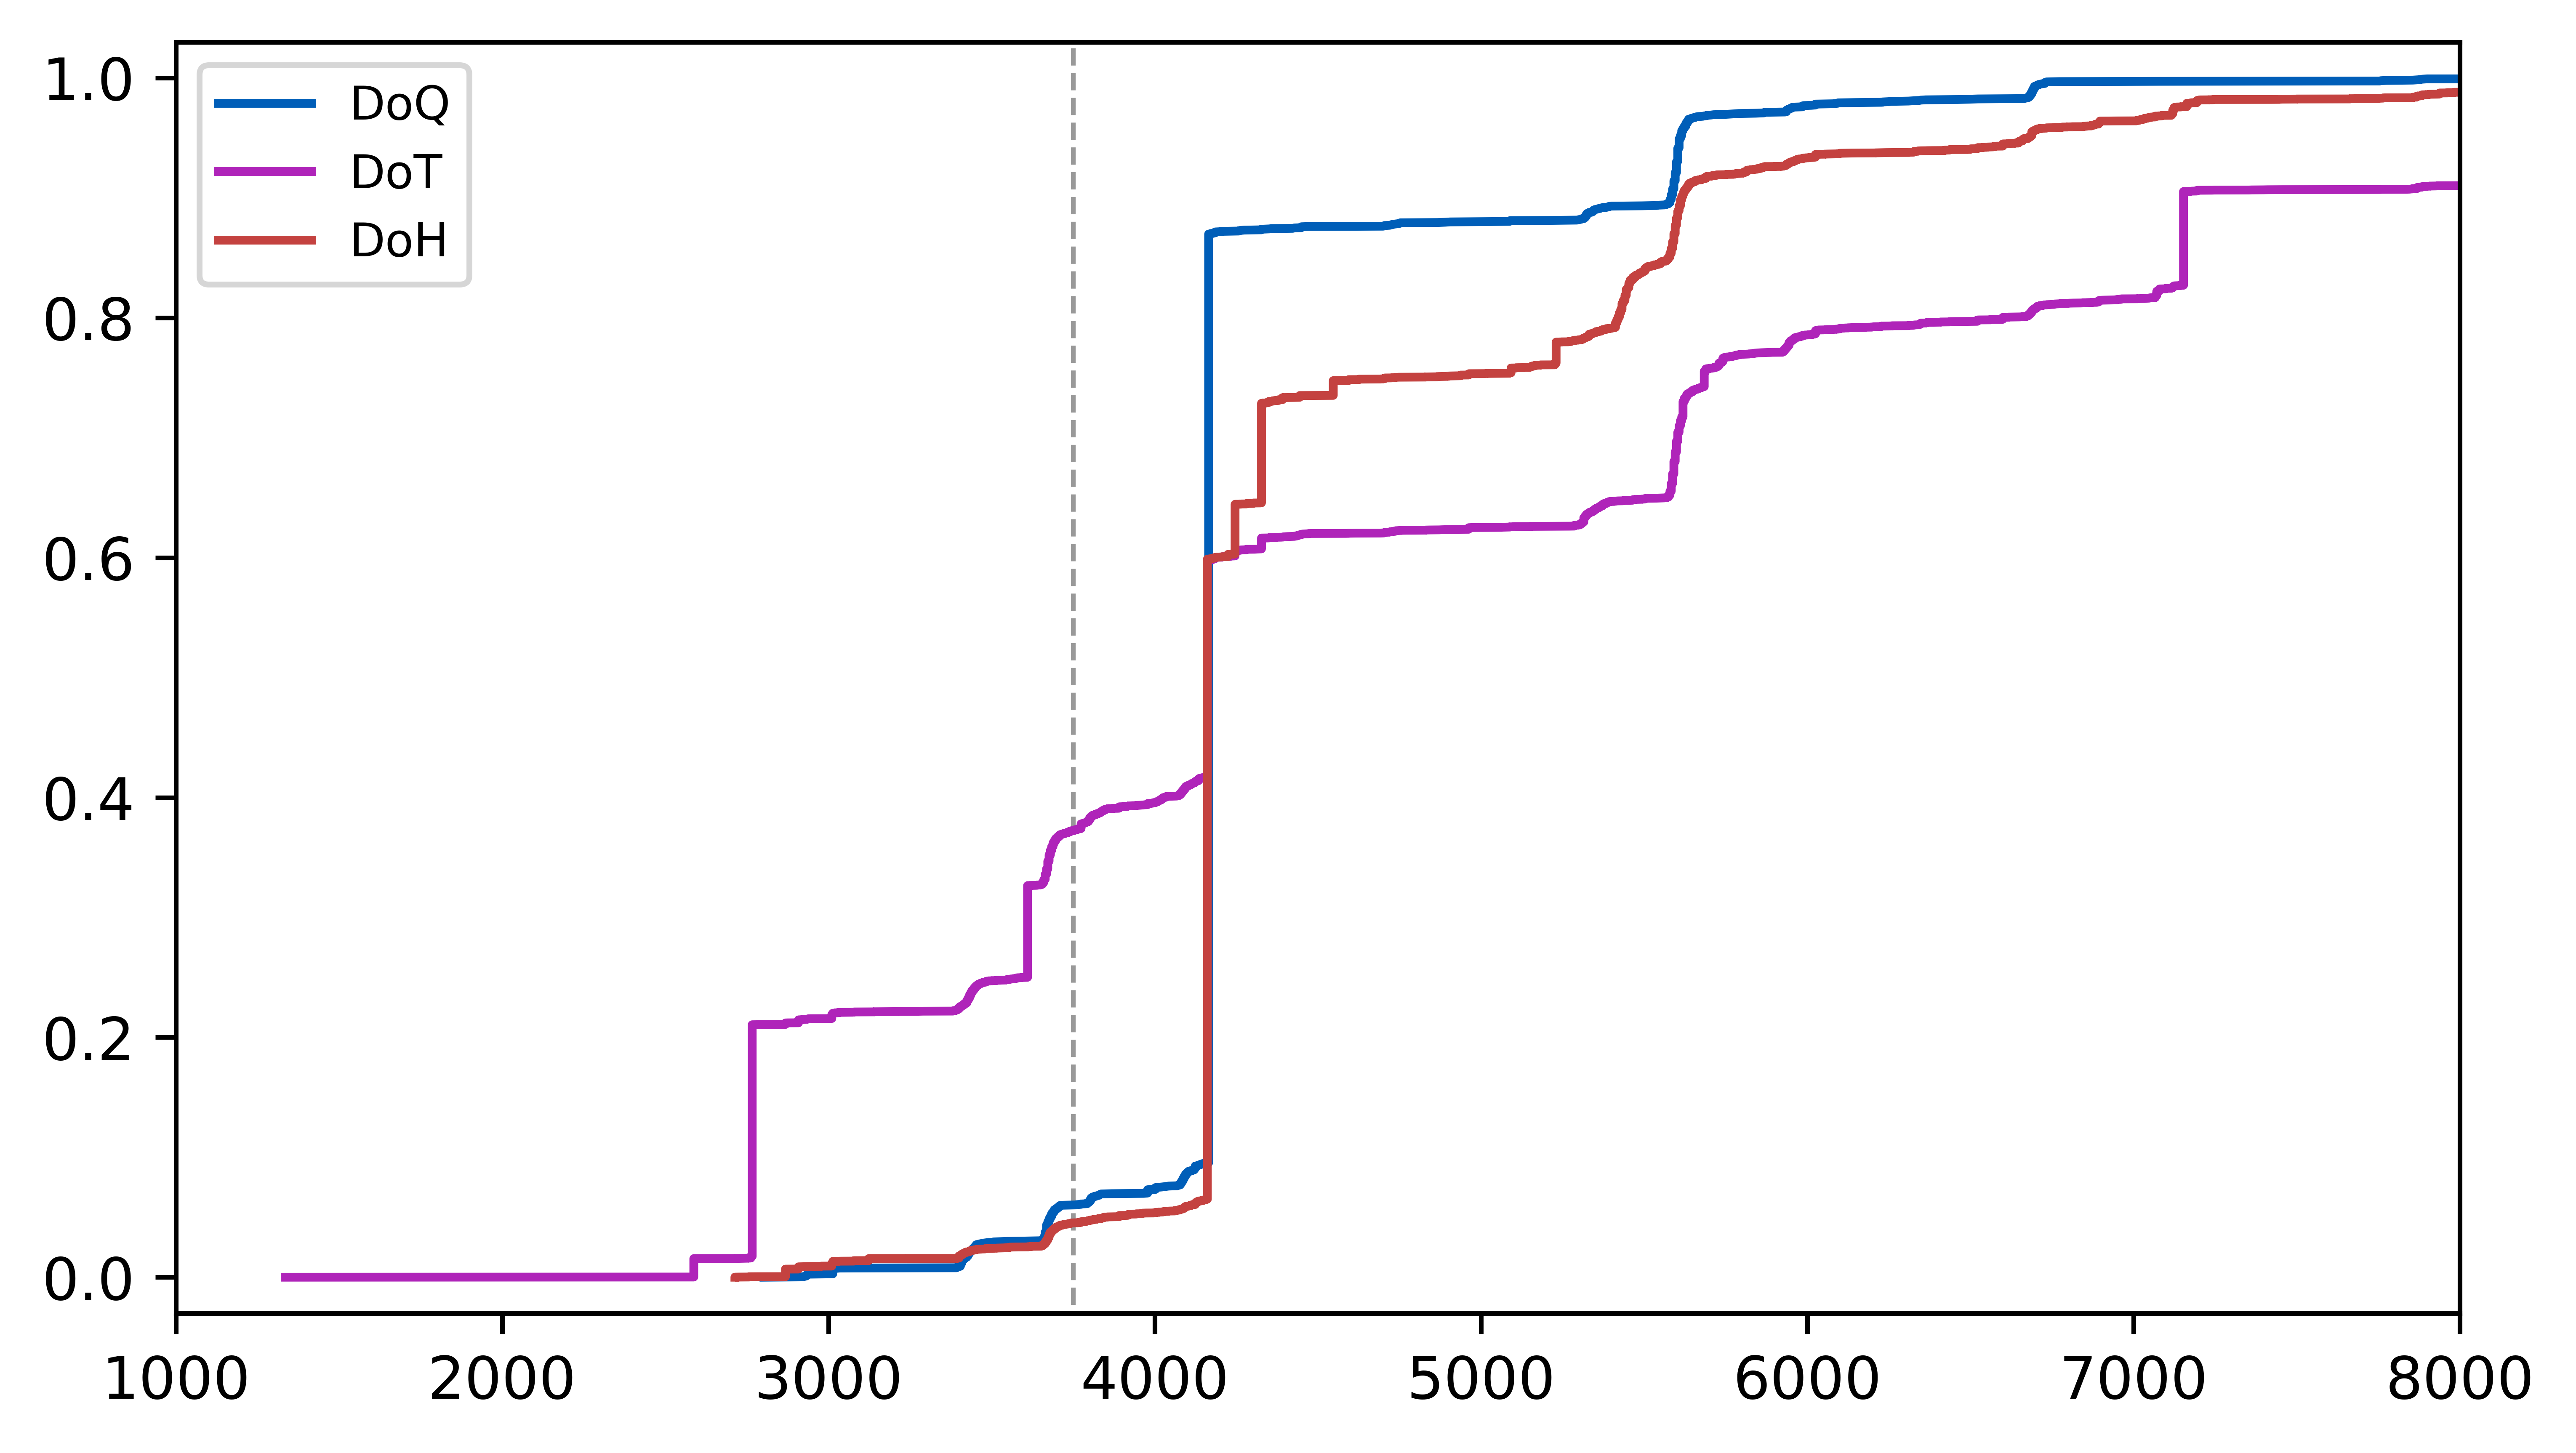

In [54]:
fig, ax = plt.subplots(figsize=(7,4),dpi=1000)

sample1 = all_raw[all_raw["certLen"]!=1]["certChainSize"]
sample2 = raw_doh3[raw_doh3["certLen"]!=1]["certChainSize"]
sample3 = raw_dot[raw_dot["certLen"]!=1]["certChainSize"]
sample4 = raw_doh[raw_doh["certLen"]!=1]["certChainSize"]

s1 = np.sort(sample1)
s2 = np.sort(sample2)
s3 = np.sort(sample3)
s4 = np.sort(sample4)



color_list = ["#af24b9", '#84584e', '#c44240', '#486c46', TUMBlue, TUMOrange] 
# color_list = ["#118e32","#4c395f","#a82e2a","#1c5f52","#387085",TUMBlue]
#eba871
#387085
plt.plot([3750,3750], [-1,2],color="gray",linestyle="--",alpha=0.8,linewidth=0.8)


ax.plot(s1,np.arange(len(s1))/float(len(s1)),color = TUMBlue,label="DoQ")
# ax.plot(s2,np.arange(len(s2))/float(len(s2)),color = TUMOrange,label="DoH3")
ax.plot(s3,np.arange(len(s3))/float(len(s3)),color = color_list[0],label="DoT")
ax.plot(s4,np.arange(len(s4))/float(len(s4)),color = color_list[2],label="DoH")

plt.legend(fontsize=8,loc =0)

plt.xlim(1000,8000)
plt.ylim(-0.03,1.03)
plt.yticks(np.arange(0,1.1,0.2))
plt.show()

# 分析qlog 

In [55]:
def get_retry(data, num):
    retry = '"retry"'
    if num == 0: 
        return data['qlog_message_0'].count(retry)
    elif num == 1: 
        return data['qlog_message_1'].count(retry)
    elif num == 2: 
        return data['qlog_message_2'].count(retry)

In [56]:
def get_limit(data, num):
    limit = '"application_limited"'
    if num == 0: 
        return data['qlog_message_0'].count(limit)
    elif num == 1: 
        return data['qlog_message_1'].count(limit)
    elif num == 2: 
        return data['qlog_message_2'].count(limit)

In [57]:
def get_rtt(data, num):
    rtt_str = r'"smoothed_rtt":.*'
    if num == 0: 
        return re.findall(rtt_str,data['qlog_message_0'])[-1].split(": ")[1]
    elif num == 1: 
        return re.findall(rtt_str,data['qlog_message_1'])[-1].split(": ")[1]
    elif num == 2: 
        return re.findall(rtt_str,data['qlog_message_2'])[-1].split(": ")[1]

In [58]:
def new_qlog(qlog):

    qlog = qlog.assign(qlog_message_0=qlog.apply(lambda x: x["qlog_message"].split("||||||")[0], axis=1))
    qlog = qlog.assign(retry_num_0=qlog.apply(lambda x: get_retry(x,0), axis=1))
    qlog = qlog.assign(limit_num_0=qlog.apply(lambda x: get_limit(x,0), axis=1))
    qlog = qlog.assign(rtt_0=qlog.apply(lambda x: get_rtt(x,0), axis=1))
    
    qlog = qlog.assign(qlog_message_1=qlog.apply(lambda x: x["qlog_message"].split("||||||")[1], axis=1))
    qlog = qlog.assign(retry_num_1=qlog.apply(lambda x: get_retry(x,1), axis=1))
    qlog = qlog.assign(limit_num_1=qlog.apply(lambda x: get_limit(x,1), axis=1))
    qlog = qlog.assign(rtt_1=qlog.apply(lambda x: get_rtt(x,1), axis=1))
    
    qlog = qlog.assign(qlog_message_2=qlog.apply(lambda x: x["qlog_message"].split("||||||")[2], axis=1))
    qlog = qlog.assign(retry_num_2=qlog.apply(lambda x: get_retry(x,2), axis=1))
    qlog = qlog.assign(limit_num_2=qlog.apply(lambda x: get_limit(x,2), axis=1))
    qlog = qlog.assign(rtt_2=qlog.apply(lambda x: get_rtt(x,2), axis=1))
    
    return qlog

In [59]:
raw_qlog = pd.read_json("./qlog/result_qlog.txt",lines=True)
raw_qlog

,ip,port,qlog_message
0,135.125.236.63,853,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q..."
1,200.25.13.201,853,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q..."
2,23.247.213.128,853,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q..."
3,23.247.214.32,853,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q..."
4,37.252.255.23,853,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q..."
...,...,...,...
3414,23.247.213.209,853,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q..."
3415,23.247.214.79,853,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q..."
3416,45.145.225.187,853,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q..."
3417,45.90.29.76,853,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q..."


In [60]:
raw_qlog = new_qlog(raw_qlog)
raw_qlog

,ip,port,qlog_message,qlog_message_0,retry_num_0,limit_num_0,rtt_0,qlog_message_1,retry_num_1,limit_num_1,rtt_1,qlog_message_2,retry_num_2,limit_num_2,rtt_2
0,135.125.236.63,853,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...","[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",1,1,294.087,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,292.052,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,292.196
1,200.25.13.201,853,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...","[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,285.994,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,287.508,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,285.212
2,23.247.213.128,853,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...","[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,187.956,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,188.127,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,190.007
3,23.247.214.32,853,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...","[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,150.442,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,150.527,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,150.236
4,37.252.255.23,853,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...","[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,354.441,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,354.313,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,354.355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3414,23.247.213.209,853,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...","[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,172.691,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,172.764,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,172.652
3415,23.247.214.79,853,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...","[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,155.15,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,168.263,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,160.759
3416,45.145.225.187,853,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...","[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",1,1,260.917,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,260.209,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,258.033
3417,45.90.29.76,853,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...","[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,157.007,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,156.966,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,157.045


## retry

In [84]:
print(raw_qlog["retry_num_0"].value_counts())
raw_qlog["retry_num_0"].value_counts()/len(raw_qlog)*100

0    2581
1     838
Name: retry_num_0, dtype: int64


0    75.489909
1    24.510091
Name: retry_num_0, dtype: float64

In [62]:
raw_qlog["retry_num_2"].value_counts()

0    3418
1       1
Name: retry_num_2, dtype: int64

## ap 

In [63]:
raw_qlog["limit_num_0"].value_counts()

1    3416
0       3
Name: limit_num_0, dtype: int64

In [64]:
raw_qlog["limit_num_2"].value_counts()

1    3418
0       1
Name: limit_num_2, dtype: int64

## RTT 

### scan

In [65]:
doq_scan_perf = pd.read_json("./qlog/result_scan.txt",lines=True)
doq_scan_perf = doq_scan_perf[doq_scan_perf["success_flag"]==True]
doq_scan_perf

,ip,port,tls_ver,quic_ver,quic_negotiated_protocol,success_flag,query_time,total_time,quic_used0RTT,handshake_time
0,135.125.236.63,853,tls1_3,ver_1,doq,True,292.227440,878.700919,True,587.213739
1,200.25.13.201,853,tls1_3,ver_1,doq,True,290.301125,774.876688,False,484.555314
2,23.247.213.128,853,tls1_3,ver_1,doq,True,218.409729,564.803359,False,376.458602
3,23.247.214.32,853,tls1_3,ver_1,doq,True,150.558356,451.751880,False,301.270543
4,37.252.255.23,853,tls1_3,ver_1,doq,True,354.337403,909.682714,False,555.322370
...,...,...,...,...,...,...,...,...,...,...
3414,23.247.213.209,853,tls1_3,ver_1,doq,True,173.069627,518.845086,False,345.882377
3415,23.247.214.79,853,tls1_3,ver_1,doq,True,168.353506,466.239185,False,308.974241
3416,45.145.225.187,853,tls1_3,ver_1,doq,True,258.284396,778.067132,True,520.764831
3417,45.90.29.76,853,tls1_3,ver_1,doq,True,157.353288,471.177758,False,314.316988


In [91]:
doq_location = pd.read_json("../../adoption/hk_data/doq/location/all_doq_location.txt",lines=True)
# doq_location = pd.DataFrame(doq_location,columns = ['query','country','as'])
doq_location = doq_location.rename(columns={"query":"ip"})

In [92]:
doq_scan_perf = pd.merge(doq_scan_perf,doq_location,on=['ip'])

In [93]:
print(doq_scan_perf["quic_used0RTT"].value_counts())
doq_scan_perf["quic_used0RTT"].value_counts()/len(doq_scan_perf)*100

False    3280
True      507
Name: quic_used0RTT, dtype: int64


False    86.612094
True     13.387906
Name: quic_used0RTT, dtype: float64

In [95]:
doq_scan_perf[doq_scan_perf["quic_used0RTT"]==True].org.value_counts()

                                               33
DigitalOcean, LLC                              24
Linode                                         21
Tencent cloud computing (Beijing) Co., Ltd.    13
Aliyun Computing Co., LTD                      11
                                               ..
DA International Group Ltd                      1
2EZ Network Inc                                 1
Netia SA                                        1
Hong Kong Broadband Network Ltd                 1
Prepaid Hoster                                  1
Name: org, Length: 241, dtype: int64

In [67]:
qlog_scan = pd.DataFrame(raw_qlog,columns=['ip', 'qlog_message_0','retry_num_0','limit_num_0','rtt_0'])
doq_scan_perf = pd.merge(doq_scan_perf, qlog_scan, on=['ip'],how="left")
doq_scan_perf

,ip,port,tls_ver,quic_ver,quic_negotiated_protocol,success_flag,query_time,total_time,quic_used0RTT,handshake_time,qlog_message_0,retry_num_0,limit_num_0,rtt_0
0,135.125.236.63,853,tls1_3,ver_1,doq,True,292.227440,878.700919,True,587.213739,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",1,1,294.087
1,200.25.13.201,853,tls1_3,ver_1,doq,True,290.301125,774.876688,False,484.555314,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,285.994
2,23.247.213.128,853,tls1_3,ver_1,doq,True,218.409729,564.803359,False,376.458602,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,187.956
3,23.247.214.32,853,tls1_3,ver_1,doq,True,150.558356,451.751880,False,301.270543,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,150.442
4,37.252.255.23,853,tls1_3,ver_1,doq,True,354.337403,909.682714,False,555.322370,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,354.441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3214,23.247.213.209,853,tls1_3,ver_1,doq,True,173.069627,518.845086,False,345.882377,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,172.691
3215,23.247.214.79,853,tls1_3,ver_1,doq,True,168.353506,466.239185,False,308.974241,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,155.15
3216,45.145.225.187,853,tls1_3,ver_1,doq,True,258.284396,778.067132,True,520.764831,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",1,1,260.917
3217,45.90.29.76,853,tls1_3,ver_1,doq,True,157.353288,471.177758,False,314.316988,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,157.007


In [72]:
doq_scan_perf[doq_scan_perf['limit_num_0']==0]

,ip,port,tls_ver,quic_ver,quic_negotiated_protocol,success_flag,query_time,total_time,quic_used0RTT,handshake_time,qlog_message_0,retry_num_0,limit_num_0,rtt_0,certChainSize
1011,121.36.156.36,853,tls1_3,ver_1,doq,True,136.040542,4314.762923,True,4178.703481,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,0,0,4752
3710,124.220.182.107,853,tls1_3,ver_1,doq,True,256.171111,618.324266,True,523.944464,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",1,0,95.472541,4750


In [68]:
temp = pd.DataFrame(all_raw, columns=['ip','certChainSize'])
doq_scan_perf = pd.merge(doq_scan_perf, temp, on=['ip'],how="left")
doq_scan_perf

,ip,port,tls_ver,quic_ver,quic_negotiated_protocol,success_flag,query_time,total_time,quic_used0RTT,handshake_time,qlog_message_0,retry_num_0,limit_num_0,rtt_0,certChainSize
0,135.125.236.63,853,tls1_3,ver_1,doq,True,292.227440,878.700919,True,587.213739,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",1,1,294.087,3676
1,200.25.13.201,853,tls1_3,ver_1,doq,True,290.301125,774.876688,False,484.555314,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,285.994,4165
2,23.247.213.128,853,tls1_3,ver_1,doq,True,218.409729,564.803359,False,376.458602,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,187.956,4165
3,23.247.213.128,853,tls1_3,ver_1,doq,True,218.409729,564.803359,False,376.458602,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,187.956,4165
4,23.247.214.32,853,tls1_3,ver_1,doq,True,150.558356,451.751880,False,301.270543,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,150.442,4165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3782,23.247.214.79,853,tls1_3,ver_1,doq,True,168.353506,466.239185,False,308.974241,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,155.15,4165
3783,45.145.225.187,853,tls1_3,ver_1,doq,True,258.284396,778.067132,True,520.764831,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",1,1,260.917,5607
3784,45.90.29.76,853,tls1_3,ver_1,doq,True,157.353288,471.177758,False,314.316988,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,157.007,4165
3785,45.90.29.76,853,tls1_3,ver_1,doq,True,157.353288,471.177758,False,314.316988,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,157.007,4165


In [76]:
def handshake_rtt_num(data):
#     if type(data["total_time"]) != str and type(data["rtt_0"]) != str:
#         return data["total_time"]/data["rtt_0"]
#     return -1
    total_time = data["handshake_time"]
    rtt = float(data["rtt_0"])
    if rtt ==0:
        return -1
    return round(total_time/rtt)
    

In [77]:
doq_scan_perf = doq_scan_perf.assign(handshake_rtt_num=doq_scan_perf.apply(lambda x: handshake_rtt_num(x), axis=1))
doq_scan_perf

,ip,port,tls_ver,quic_ver,quic_negotiated_protocol,success_flag,query_time,total_time,quic_used0RTT,handshake_time,qlog_message_0,retry_num_0,limit_num_0,rtt_0,certChainSize,handshake_rtt_num
0,135.125.236.63,853,tls1_3,ver_1,doq,True,292.227440,878.700919,True,587.213739,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",1,1,294.087,3676,2
1,200.25.13.201,853,tls1_3,ver_1,doq,True,290.301125,774.876688,False,484.555314,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,285.994,4165,2
2,23.247.213.128,853,tls1_3,ver_1,doq,True,218.409729,564.803359,False,376.458602,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,187.956,4165,2
3,23.247.213.128,853,tls1_3,ver_1,doq,True,218.409729,564.803359,False,376.458602,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,187.956,4165,2
4,23.247.214.32,853,tls1_3,ver_1,doq,True,150.558356,451.751880,False,301.270543,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,150.442,4165,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3782,23.247.214.79,853,tls1_3,ver_1,doq,True,168.353506,466.239185,False,308.974241,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,155.15,4165,2
3783,45.145.225.187,853,tls1_3,ver_1,doq,True,258.284396,778.067132,True,520.764831,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",1,1,260.917,5607,2
3784,45.90.29.76,853,tls1_3,ver_1,doq,True,157.353288,471.177758,False,314.316988,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,157.007,4165,2
3785,45.90.29.76,853,tls1_3,ver_1,doq,True,157.353288,471.177758,False,314.316988,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,157.007,4165,2


In [78]:
doq_scan_perf["handshake_rtt_num"].value_counts()

 2     3648
 3       67
 1       46
 4        9
 18       4
 5        3
 6        3
 7        2
 11       1
-1        1
 14       1
 63       1
 38       1
Name: handshake_rtt_num, dtype: int64

In [82]:
doq_scan_perf[doq_scan_perf["handshake_rtt_num"]==4]

,ip,port,tls_ver,quic_ver,quic_negotiated_protocol,success_flag,query_time,total_time,quic_used0RTT,handshake_time,qlog_message_0,retry_num_0,limit_num_0,rtt_0,certChainSize,handshake_rtt_num
166,45.90.29.122,853,tls1_3,ver_1,doq,True,582.862548,845.814321,False,686.478197,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,159.278,4165,4
413,45.90.30.72,853,tls1_3,ver_1,doq,True,2.825665,14.682583,False,12.026983,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,2.895,4165,4
652,45.90.28.148,853,tls1_3,ver_1,doq,True,1.964787,7.959430,False,6.152308,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,1.742,4165,4
904,45.90.29.104,853,tls1_3,ver_1,doq,True,149.486279,700.970344,False,551.496353,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,149.491,4165,4
1232,45.90.28.196,853,tls1_3,ver_1,doq,True,1.971314,10.007924,False,8.349688,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,1.924,4165,4
1233,45.90.28.196,853,tls1_3,ver_1,doq,True,1.971314,10.007924,False,8.349688,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,1.924,4165,4
2433,45.90.29.57,853,tls1_3,ver_1,doq,True,559.076413,1239.690109,False,731.101187,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,170.425,4165,4
3105,45.90.28.198,853,tls1_3,ver_1,doq,True,2.015057,11.377917,False,9.339270,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,2.245,4165,4
3405,116.118.44.237,853,tls1_3,ver_1,doq,True,35.871805,163.808222,False,127.919628,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",1,1,36.454,5607,4


In [79]:
doq_scan_perf[doq_scan_perf["retry_num_0"]==1]["handshake_rtt_num"].value_counts()

2     598
3      41
1       8
11      1
14      1
18      1
6       1
4       1
63      1
5       1
Name: handshake_rtt_num, dtype: int64

In [80]:
doq_scan_perf[(doq_scan_perf["retry_num_0"]==1) & (doq_scan_perf["handshake_rtt_num"]==4)]

,ip,port,tls_ver,quic_ver,quic_negotiated_protocol,success_flag,query_time,total_time,quic_used0RTT,handshake_time,qlog_message_0,retry_num_0,limit_num_0,rtt_0,certChainSize,handshake_rtt_num
3405,116.118.44.237,853,tls1_3,ver_1,doq,True,35.871805,163.808222,False,127.919628,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",1,1,36.454,5607,4


### reuse

In [96]:
doq_reuse_perf = pd.read_json("./qlog/result_reuse.txt",lines=True)
doq_reuse_perf = doq_reuse_perf[doq_reuse_perf["success_flag"]==True]

doq_reuse_perf

,ip,port,tls_ver,quic_ver,quic_negotiated_protocol,success_flag,query_time,total_time,quic_used0RTT,handshake_time
0,135.125.236.63,853,tls1_3,ver_1,doq,True,291.469473,585.022352,True,0.397949
1,200.25.13.201,853,tls1_3,ver_1,doq,True,284.684299,571.498529,False,286.785152
2,23.247.213.128,853,tls1_3,ver_1,doq,True,188.005890,377.019893,False,188.929567
3,23.247.214.32,853,tls1_3,ver_1,doq,True,150.379964,301.517338,False,151.111585
4,37.252.255.23,853,tls1_3,ver_1,doq,True,354.167467,709.327079,False,355.138868
...,...,...,...,...,...,...,...,...,...,...
3414,23.247.213.209,853,tls1_3,ver_1,doq,True,172.842955,346.437286,False,173.373111
3415,23.247.214.79,853,tls1_3,ver_1,doq,True,154.674801,318.371357,False,163.673616
3416,45.145.225.187,853,tls1_3,ver_1,doq,True,256.885959,516.960625,True,0.308116
3417,45.90.29.76,853,tls1_3,ver_1,doq,True,156.839829,314.958688,False,157.595497


In [97]:
doq_reuse_perf["quic_used0RTT"].value_counts()

False    2712
True      507
Name: quic_used0RTT, dtype: int64

In [98]:
qlog_reuse = pd.DataFrame(raw_qlog,columns=['ip', 'qlog_message_2','retry_num_2','limit_num_2','rtt_2'])
doq_reuse_perf = pd.merge(doq_reuse_perf, qlog_reuse, on=['ip'],how="left")
doq_reuse_perf

,ip,port,tls_ver,quic_ver,quic_negotiated_protocol,success_flag,query_time,total_time,quic_used0RTT,handshake_time,qlog_message_2,retry_num_2,limit_num_2,rtt_2
0,135.125.236.63,853,tls1_3,ver_1,doq,True,291.469473,585.022352,True,0.397949,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,292.196
1,200.25.13.201,853,tls1_3,ver_1,doq,True,284.684299,571.498529,False,286.785152,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,285.212
2,23.247.213.128,853,tls1_3,ver_1,doq,True,188.005890,377.019893,False,188.929567,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,190.007
3,23.247.214.32,853,tls1_3,ver_1,doq,True,150.379964,301.517338,False,151.111585,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,150.236
4,37.252.255.23,853,tls1_3,ver_1,doq,True,354.167467,709.327079,False,355.138868,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,354.355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3214,23.247.213.209,853,tls1_3,ver_1,doq,True,172.842955,346.437286,False,173.373111,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,172.652
3215,23.247.214.79,853,tls1_3,ver_1,doq,True,154.674801,318.371357,False,163.673616,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,160.759
3216,45.145.225.187,853,tls1_3,ver_1,doq,True,256.885959,516.960625,True,0.308116,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,258.033
3217,45.90.29.76,853,tls1_3,ver_1,doq,True,156.839829,314.958688,False,157.595497,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,157.045


In [99]:
temp = pd.DataFrame(all_raw, columns=['ip','certChainSize'])
doq_reuse_perf = pd.merge(doq_reuse_perf, temp, on=['ip'],how="left")
doq_reuse_perf

,ip,port,tls_ver,quic_ver,quic_negotiated_protocol,success_flag,query_time,total_time,quic_used0RTT,handshake_time,qlog_message_2,retry_num_2,limit_num_2,rtt_2,certChainSize
0,135.125.236.63,853,tls1_3,ver_1,doq,True,291.469473,585.022352,True,0.397949,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,292.196,3676
1,200.25.13.201,853,tls1_3,ver_1,doq,True,284.684299,571.498529,False,286.785152,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,285.212,4165
2,23.247.213.128,853,tls1_3,ver_1,doq,True,188.005890,377.019893,False,188.929567,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,190.007,4165
3,23.247.213.128,853,tls1_3,ver_1,doq,True,188.005890,377.019893,False,188.929567,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,190.007,4165
4,23.247.214.32,853,tls1_3,ver_1,doq,True,150.379964,301.517338,False,151.111585,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,150.236,4165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3782,23.247.214.79,853,tls1_3,ver_1,doq,True,154.674801,318.371357,False,163.673616,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,160.759,4165
3783,45.145.225.187,853,tls1_3,ver_1,doq,True,256.885959,516.960625,True,0.308116,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,258.033,5607
3784,45.90.29.76,853,tls1_3,ver_1,doq,True,156.839829,314.958688,False,157.595497,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,157.045,4165
3785,45.90.29.76,853,tls1_3,ver_1,doq,True,156.839829,314.958688,False,157.595497,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,157.045,4165


In [100]:
def handshake_rtt_num(data):
#     if type(data["total_time"]) != str and type(data["rtt_0"]) != str:
#         return data["total_time"]/data["rtt_0"]
#     return -1
    total_time = data["handshake_time"]
    rtt = float(data["rtt_2"])
#     return round(total_time/rtt)
    return total_time/rtt
    

In [101]:
doq_reuse_perf = doq_reuse_perf.assign(handshake_rtt_num=doq_reuse_perf.apply(lambda x: handshake_rtt_num(x), axis=1))
doq_reuse_perf

,ip,port,tls_ver,quic_ver,quic_negotiated_protocol,success_flag,query_time,total_time,quic_used0RTT,handshake_time,qlog_message_2,retry_num_2,limit_num_2,rtt_2,certChainSize,handshake_rtt_num
0,135.125.236.63,853,tls1_3,ver_1,doq,True,291.469473,585.022352,True,0.397949,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,292.196,3676,0.001362
1,200.25.13.201,853,tls1_3,ver_1,doq,True,284.684299,571.498529,False,286.785152,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,285.212,4165,1.005516
2,23.247.213.128,853,tls1_3,ver_1,doq,True,188.005890,377.019893,False,188.929567,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,190.007,4165,0.994330
3,23.247.213.128,853,tls1_3,ver_1,doq,True,188.005890,377.019893,False,188.929567,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,190.007,4165,0.994330
4,23.247.214.32,853,tls1_3,ver_1,doq,True,150.379964,301.517338,False,151.111585,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,150.236,4165,1.005828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3782,23.247.214.79,853,tls1_3,ver_1,doq,True,154.674801,318.371357,False,163.673616,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,160.759,4165,1.018130
3783,45.145.225.187,853,tls1_3,ver_1,doq,True,256.885959,516.960625,True,0.308116,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,258.033,5607,0.001194
3784,45.90.29.76,853,tls1_3,ver_1,doq,True,156.839829,314.958688,False,157.595497,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,157.045,4165,1.003505
3785,45.90.29.76,853,tls1_3,ver_1,doq,True,156.839829,314.958688,False,157.595497,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,157.045,4165,1.003505


In [102]:
doq_reuse_perf["handshake_rtt_num"].value_counts()

1.006623    2
1.005300    2
1.274033    2
1.003767    2
1.003607    2
           ..
0.001498    1
1.003087    1
1.004628    1
0.993049    1
1.014096    1
Name: handshake_rtt_num, Length: 3219, dtype: int64

In [106]:
doq_reuse_perf[doq_reuse_perf["handshake_rtt_num"]>1.8]

,ip,port,tls_ver,quic_ver,quic_negotiated_protocol,success_flag,query_time,total_time,quic_used0RTT,handshake_time,qlog_message_2,retry_num_2,limit_num_2,rtt_2,certChainSize,handshake_rtt_num
295,107.172.99.73,853,tls1_3,ver_1,doq,True,150.757646,456.346983,False,305.567849,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,153.482,5636,1.990903
369,45.90.28.33,853,tls1_3,ver_1,doq,True,1.368039,5.580206,False,3.610388,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,1.644,4165,2.196100
408,203.135.104.2,853,tls1_3,ver_1,doq,True,101.313451,1204.018273,False,775.242060,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,100.59,5587,7.706950
2461,2.59.117.61,853,tls1_3,ver_1,doq,True,231.993093,664.068774,False,432.052475,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,237.741,6696,1.817324
3619,222.187.239.65,853,tls1_3,ver_1,doq,True,108.370774,1362.724232,False,1236.347526,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,0,101.625,3793,12.165781
3674,42.112.30.71,853,tls1_3,ver_1,doq,True,24.084006,78.177857,False,53.607419,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,28.144,6688,1.904755
3725,45.90.219.132,853,tls1_3,ver_1,doq,True,184.955994,559.365145,False,374.387076,"[\n {\n ""code_version"": ""v0.29.2"",\n ""q...",0,1,190.364,4720,1.966691


### CDF 

In [ ]:
fig, ax = plt.subplots(figsize=(7,4),dpi=1000)

sample1 = list(doq_scan_perf["handshake_rtt_num"])
sample2 = list(doq_reuse_perf["handshake_rtt_num"])

s1 = np.sort(sample1)
s2 = np.sort(sample2)


color_list = ["#af24b9", '#84584e', '#c44240', '#486c46', TUMBlue, TUMOrange] 
# color_list = ["#118e32","#4c395f","#a82e2a","#1c5f52","#387085",TUMBlue]
#eba871
#387085
# plt.plot([3750,3750], [-1,2],color="gray",linestyle="--",alpha=0.8,linewidth=0.8)


ax.plot(s1,np.arange(len(s1))/float(len(s1)),color = TUMBlue,label="DoQ")
# ax.plot(s2,np.arange(len(s2))/float(len(s2)),color = TUMOrange,label="DoH3")

plt.legend(fontsize=8,loc =0)

plt.xlim(0,5)
# plt.ylim(-0.03,1.03)
# plt.yticks(np.arange(0,1.1,0.2))
plt.show()

In [ ]:
doq_reuse_perf[doq_reuse_perf["quic_used0RTT"]==True]

In [ ]:
doq_reuse_perf[(doq_reuse_perf["handshake_rtt_num"]==0)&(doq_reuse_perf["quic_used0RTT"]==False)]